# 0) Imports

Install the packages

In [1]:
pip install pandas yfinance matplotlib seaborn notebook ipykernel


  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------- ----- 2.6/3.0 MB 13.7 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 9.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached argon2_cffi-23.1.0-py

In [ ]:
# install the main library YFinance
!pip install yfinance

In [3]:
pip install pandas_datareader


  Using cached pandas_datareader-0.10.0-py3-none-any.whl.metadata (2.9 kB)
Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   --------------------------- ------------ 2.6/3.8 MB 13.7 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 13.4 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   -------------------- ------------------- 1/2 [pandas_datareader]
   -------------------- ------------------- 1/2 [pandas_datareader]
   -------------------- ------------------- 1/2 [pandas_datareader]
   -------------------- ------------------- 1/2 [pandas_datareader]
   -------------------- ------------------- 1/2 [pandas_datareader]
   -------------------- ------------------- 1/2 [pandas_datareader]
   ---------------------------------------- 2/2 [pandas_datareader]

Note: you may need to restart the kernel to use up

In [5]:
pip install plotly

   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---- ----------------------------------- 1.8/16.3 MB 10.1 MB/s eta 0:00:02
   ----------- ---------------------------- 4.7/16.3 MB 11.9 MB/s eta 0:00:01
   ------------------ --------------------- 7.6/16.3 MB 12.7 MB/s eta 0:00:01
   ------------------------- -------------- 10.5/16.3 MB 12.8 MB/s eta 0:00:01
   -------------------------------- ------- 13.4/16.3 MB 13.1 MB/s eta 0:00:01
   ---------------------------------------- 16.3/16.3 MB 13.1 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0

In [6]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


# 1) Understanding Data-Driven Decisions data pulls

In [7]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2025; month= 6; day=1
Period for indexes: 1955-06-01 to 2025-06-01 


## 1.1) GDP

In [8]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)

In [9]:
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
gdppot.tail(15)

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2021-10-01,21606.08076,0.020390,0.005260
2022-01-01,21722.02480,0.020882,0.005366
2022-04-01,21840.56636,0.021403,0.005457
2022-07-01,21961.53508,0.021799,0.005539
2022-10-01,22084.92536,0.022162,0.005618
2023-01-01,22208.24254,0.022384,0.005584
2023-04-01,22333.11239,0.022552,0.005623
2023-07-01,22459.74068,0.022685,0.005670
2023-10-01,22588.18459,0.022787,0.005719


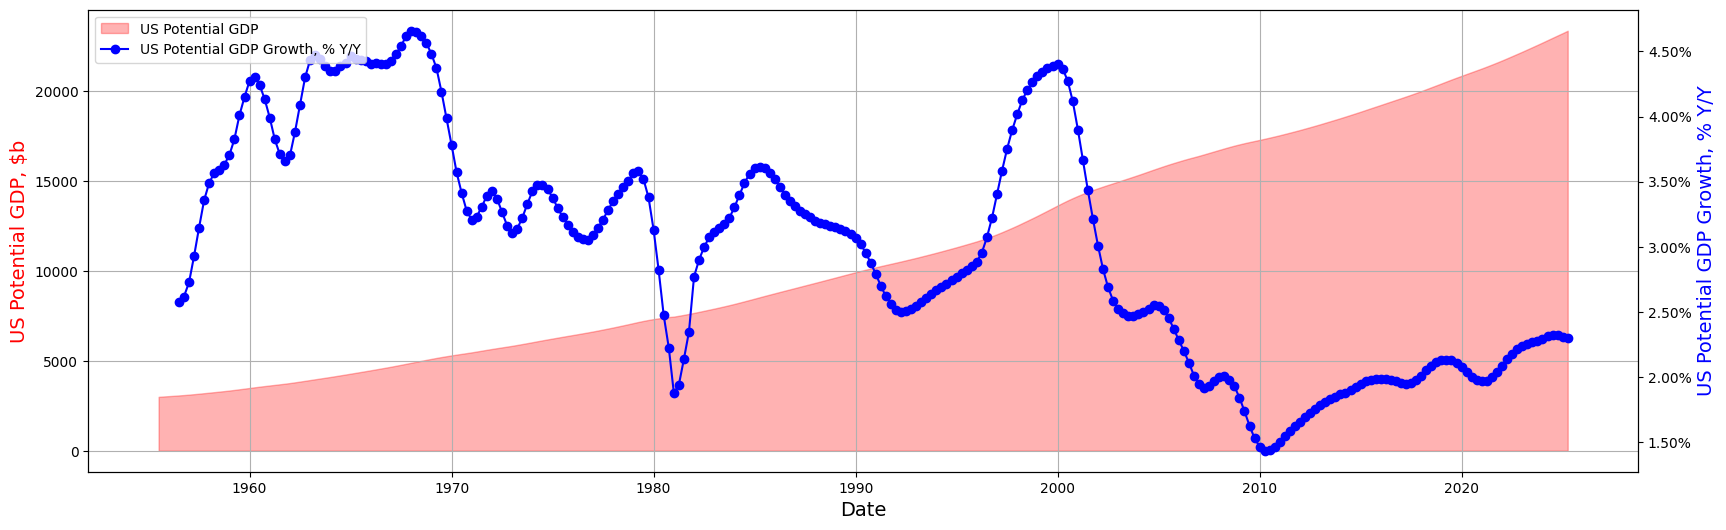

In [10]:
# Visuals GDPPOT
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(gdppot.index, gdppot.GDPPOT, color="red", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## 1.2) Inflation - CPI Core

In [11]:
# # "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)

In [12]:
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(13)

,CPILFESL,cpi_core_yoy,cpi_core_mom
DATE,,,
2024-04-01,317.596,0.036236,0.002633
2024-05-01,318.053,0.033905,0.001439
2024-06-01,318.343,0.032606,0.000912
2024-07-01,318.933,0.032283,0.001853
2024-08-01,319.839,0.032918,0.002841
2024-09-01,320.835,0.032899,0.003114
2024-10-01,321.688,0.032928,0.002659
2024-11-01,322.619,0.032801,0.002894
2024-12-01,323.296,0.032136,0.002098


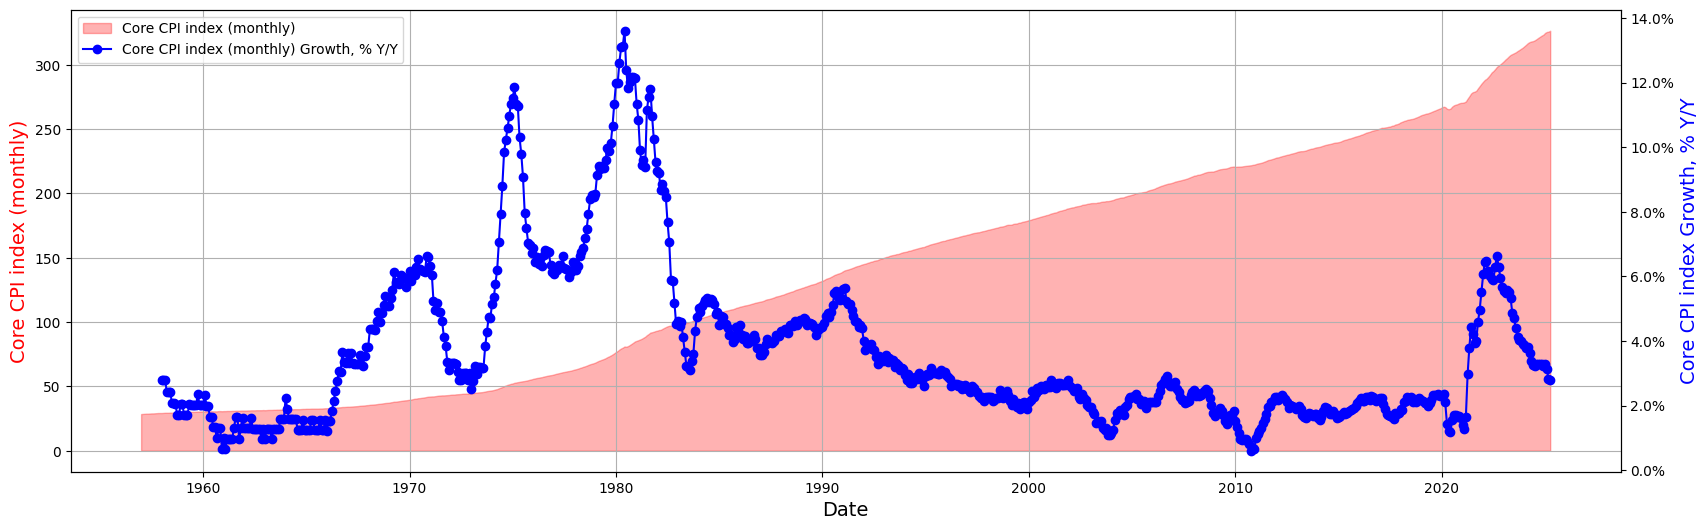

In [13]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(cpilfesl.index, cpilfesl.CPILFESL, color="red", alpha=0.3, label="Core CPI index (monthly)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpilfesl.cpi_core_yoy, color="blue", marker="o", label="Core CPI index (monthly) Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Core CPI index (monthly)", color="red", fontsize=14)
ax2.set_ylabel("Core CPI index Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## 1.3 Interest rates

In [14]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail(10)

,FEDFUNDS
DATE,
2024-07-01,5.33
2024-08-01,5.33
2024-09-01,5.13
2024-10-01,4.83
2024-11-01,4.64
2024-12-01,4.48
2025-01-01,4.33
2025-02-01,4.33
2025-03-01,4.33


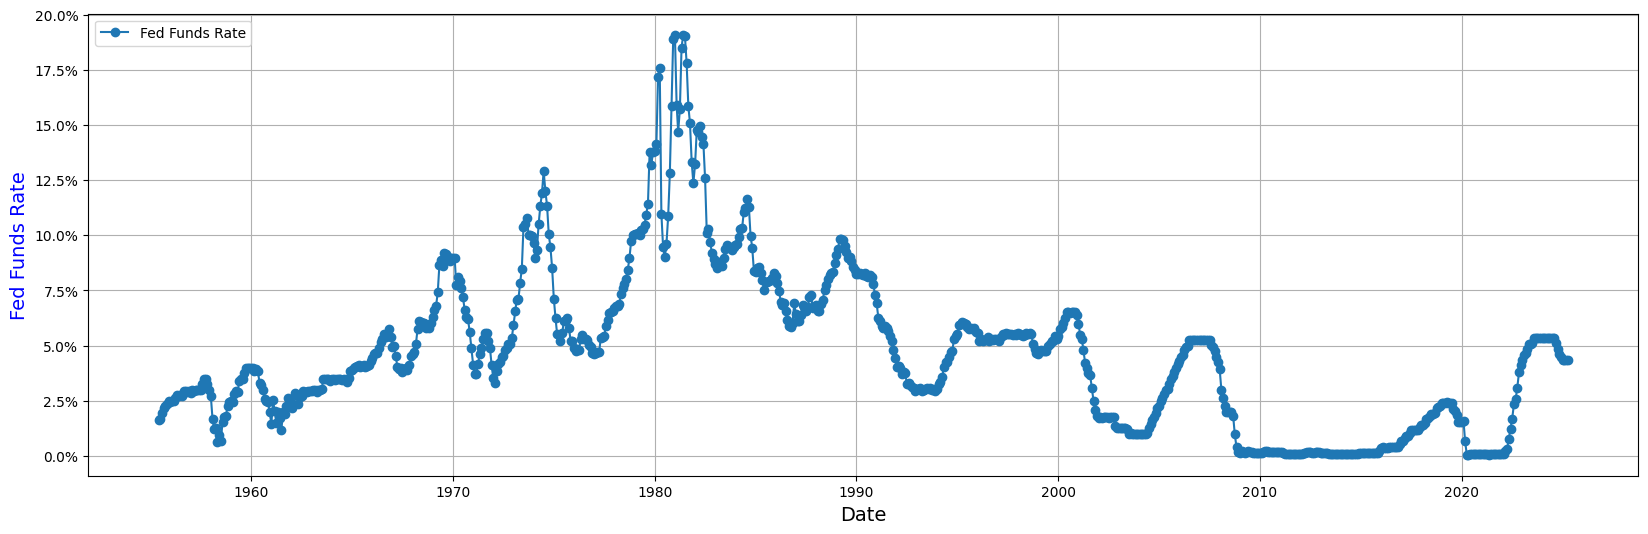

In [16]:
# Fed Funds
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

# # Creating a secondary y-axis for GDP growth percentage
# ax2 = ax.twinx()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(fedfunds.index, fedfunds.FEDFUNDS/100, marker="o", label="Fed Funds Rate")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Fed Funds Rate", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

In [17]:
# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail()

,DGS1
DATE,
2025-05-23,4.15
2025-05-26,NaN
2025-05-27,4.14
2025-05-28,4.16
2025-05-29,4.13


Other rates for US Treasury: https://fred.stlouisfed.org/categories/115  
* https://fred.stlouisfed.org/series/DGS2
* https://fred.stlouisfed.org/series/DGS3
* https://fred.stlouisfed.org/series/DGS5
* https://fred.stlouisfed.org/series/DGS10
...

In [18]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail()

,DGS5
DATE,
2025-05-23,4.08
2025-05-26,NaN
2025-05-27,4.04
2025-05-28,4.05
2025-05-29,4.00


## 1.4 SNP500

In [19]:
# Other indexes: https://stooq.com/t/

# SPX= S&P500
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-05-30,5903.67,5922.14,5843.66,5911.69,4.813836e+09
2025-05-29,5939.96,5943.13,5873.80,5912.17,2.860741e+09
2025-05-28,5925.54,5939.92,5881.88,5888.55,2.671436e+09
2025-05-27,5854.07,5924.33,5854.07,5921.54,2.908887e+09
2025-05-23,5781.89,5829.51,5767.41,5802.82,2.552790e+09


In [21]:
# 252 trading days a year
  # REVERSE ORDER OF THE DATA!!!
spx_index['spx_dod'] = (spx_index.Close/spx_index.Close.shift(-1)-1)
spx_index['spx_qoq'] = (spx_index.Close/spx_index.Close.shift(-63)-1)
spx_index['spx_yoy'] = (spx_index.Close/spx_index.Close.shift(-252)-1)

In [20]:
spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-05-30,5903.67,5922.14,5843.66,5911.69,4.813836e+09
2025-05-29,5939.96,5943.13,5873.80,5912.17,2.860741e+09
2025-05-28,5925.54,5939.92,5881.88,5888.55,2.671436e+09
2025-05-27,5854.07,5924.33,5854.07,5921.54,2.908887e+09
2025-05-23,5781.89,5829.51,5767.41,5802.82,2.552790e+09


In [22]:
spx_truncated = spx_index[spx_index.index>='1990-01-01']

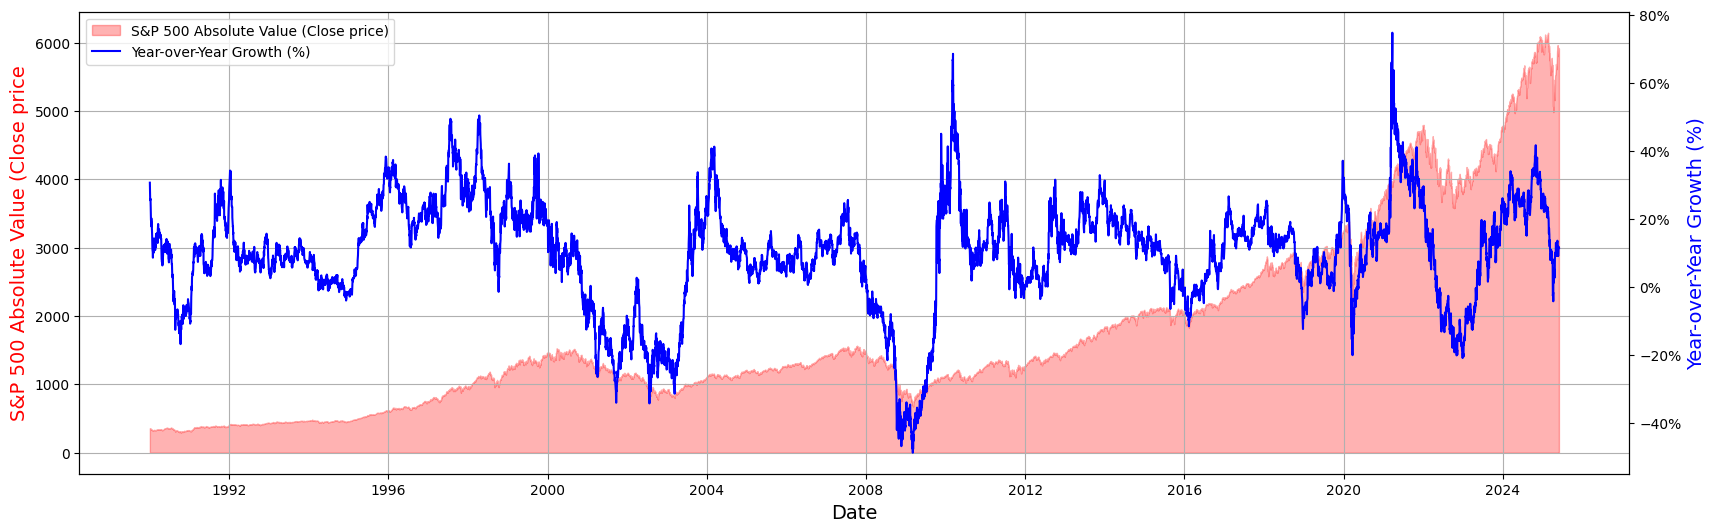

In [23]:
# S&P500 abs. vs. relative growth
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(spx_truncated.index, spx_truncated.Close, color="red", alpha=0.3, label="S&P 500 Absolute Value (Close price)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(spx_truncated.spx_yoy,
         color="blue",
        #  marker=".",
         label="Year-over-Year Growth (%)")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("S&P 500 Absolute Value (Close price", color="red", fontsize=14)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

# 2) Data Sources for Stocks

## 2.1 OHLCV data daily - INDEXES

In [24]:
# INDEXES from Yahoo Finance
# DAX index (XETRA - XETRA Delayed Price. Currency in EUR)
# WEB: https://finance.yahoo.com/quote/%5EGDAXI
# Option 1: dax_daily = yf.download(tickers = ["^GDAXI"],
#                      period = "max",
#                      interval = "1d")

# Option 2 (preferred):
# Download data with Adj Close for more accurate price reflections
ticker_obj = yf.Ticker("^GDAXI")
dax_daily = ticker_obj.history(start = start)

In [25]:
dax_daily.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-26 00:00:00+02:00,24009.099609,24050.599609,23932.039062,24027.650391,37001300,0.0,0.0
2025-05-27 00:00:00+02:00,24054.160156,24300.970703,24027.750000,24226.490234,53474100,0.0,0.0
2025-05-28 00:00:00+02:00,24250.990234,24325.970703,24038.189453,24038.189453,57894000,0.0,0.0
2025-05-29 00:00:00+02:00,24255.009766,24255.009766,23917.060547,23933.230469,42765200,0.0,0.0
2025-05-30 00:00:00+02:00,23963.490234,24181.529297,23958.429688,23997.480469,110527000,0.0,0.0


In [26]:
# normally 252 trading days
dax_daily['adj_close_last_year'] = dax_daily['Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Close'] / dax_daily['adj_close_last_year'] -1

In [27]:
dax_daily

,Open,High,Low,Close,Volume,Dividends,Stock Splits,adj_close_last_year,yoy_growth
Date,,,,,,,,,
1987-12-30 00:00:00+01:00,1005.190002,1005.190002,1005.190002,1005.190002,0,0.0,0.0,NaN,NaN
1988-01-04 00:00:00+01:00,956.489990,956.489990,956.489990,956.489990,0,0.0,0.0,NaN,NaN
1988-01-05 00:00:00+01:00,996.099976,996.099976,996.099976,996.099976,0,0.0,0.0,NaN,NaN
1988-01-06 00:00:00+01:00,1006.010010,1006.010010,1006.010010,1006.010010,0,0.0,0.0,NaN,NaN
1988-01-07 00:00:00+01:00,1014.469971,1014.469971,1014.469971,1014.469971,0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-05-26 00:00:00+02:00,24009.099609,24050.599609,23932.039062,24027.650391,37001300,0.0,0.0,18774.710938,0.279788
2025-05-27 00:00:00+02:00,24054.160156,24300.970703,24027.750000,24226.490234,53474100,0.0,0.0,18677.869141,0.297069
2025-05-28 00:00:00+02:00,24250.990234,24325.970703,24038.189453,24038.189453,57894000,0.0,0.0,18473.289062,0.301240


<Axes: xlabel='Date'>

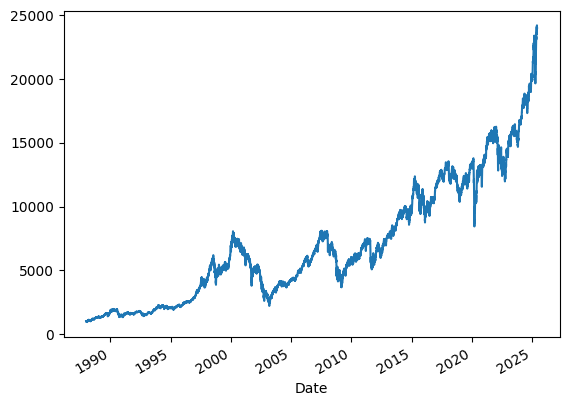

In [28]:
dax_daily['Close'].plot.line()

In [29]:
# delayed 15 min : https://finance.yahoo.com/quote/%5ESPX/
# S&P 500 INDEX : Chicago Options - Chicago Options Delayed Price. Currency in USD
ticker_obj = yf.Ticker("^SPX")
snp500_daily = ticker_obj.history(start = start, interval = "1d")

# old version:
# snp500_daily = yf.download(tickers = "^SPX",
#                      period = "max",
#                      interval = "1d")

In [30]:
snp500_daily.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-23 00:00:00-04:00,5781.890137,5829.509766,5767.410156,5802.819824,4662820000,0.0,0.0
2025-05-27 00:00:00-04:00,5854.069824,5924.330078,5854.069824,5921.540039,5366380000,0.0,0.0
2025-05-28 00:00:00-04:00,5925.540039,5939.919922,5881.879883,5888.549805,4665050000,0.0,0.0
2025-05-29 00:00:00-04:00,5939.959961,5943.129883,5873.799805,5912.169922,4569750000,0.0,0.0
2025-05-30 00:00:00-04:00,5903.669922,5922.140137,5843.660156,5911.689941,6378540000,0.0,0.0


In [31]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
# https://www.investopedia.com/insights/introduction-to-stock-market-indices/

ticker_obj = yf.Ticker("^GSPC")
snp500_daily_non_delayed = ticker_obj.history(start = start, interval = "1d")

# old version:
# snp500_daily_non_delayed = yf.download(tickers = "^GSPC",
#                      period = "max",
#                      interval = "1d")

In [32]:
snp500_daily_non_delayed.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-23 00:00:00-04:00,5781.890137,5829.509766,5767.410156,5802.819824,4662820000,0.0,0.0
2025-05-27 00:00:00-04:00,5854.069824,5924.330078,5854.069824,5921.540039,5366380000,0.0,0.0
2025-05-28 00:00:00-04:00,5925.540039,5939.919922,5881.879883,5888.549805,4665050000,0.0,0.0
2025-05-29 00:00:00-04:00,5939.959961,5943.129883,5873.799805,5912.169922,4569750000,0.0,0.0
2025-05-30 00:00:00-04:00,5903.669922,5922.140137,5843.660156,5911.689941,6378540000,0.0,0.0


In [33]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch

ticker_obj = yf.Ticker("^DJI")
dji_daily = ticker_obj.history(start = start, interval = "1d")

# dji_daily = yf.download(tickers = "^DJI",
#                      period = "max",
#                      interval = "1d")

## 2.2 OHLCV data daily - ETFs

In [34]:
# https://finance.yahoo.com/quote/VOO?.tsrc=fin-srch

ticker_obj = yf.Ticker("VOO")
voo_etf = ticker_obj.history(start = start, interval = "1d")

# voo_etf = yf.download(tickers = "VOO",
#                      period = "max",
#                      interval = "1d")


In [ ]:
voo_etf.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-04-22 00:00:00-04:00,478.070007,486.480011,477.190002,484.290009,6236300,0.0,0.0,0.0
2025-04-23 00:00:00-04:00,496.690002,501.179993,490.700012,492.070007,8047600,0.0,0.0,0.0
2025-04-24 00:00:00-04:00,493.260010,503.000000,492.220001,502.410004,6184300,0.0,0.0,0.0
2025-04-25 00:00:00-04:00,502.440002,506.519989,499.750000,506.109985,6926500,0.0,0.0,0.0
2025-04-28 00:00:00-04:00,506.809998,508.691803,501.000000,506.420013,4179047,0.0,0.0,0.0


In [35]:
# ETFs
# WisdomTree India Earnings Fund (EPI)
# NYSEArca - Nasdaq Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/EPI/history?p=EPI

ticker_obj = yf.Ticker("EPI")
epi_etf_daily = ticker_obj.history(start = start, interval = "1d")

# epi_etf_daily = yf.download(tickers = "EPI",
#                      period = "max",
#                      interval = "1d")

In [ ]:
epi_etf_daily.head()
print(epi_etf_daily.shape)

(4321, 8)


In [36]:
# find dividends impact on Close vs. Adj.Close
epi_etf_daily[epi_etf_daily.Dividends>0].tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2021-12-27 00:00:00-05:00,33.577710,33.801812,33.577710,33.764462,379100,0.192,0.0,0.0
2022-03-25 00:00:00-04:00,33.563275,33.666313,33.432129,33.666313,584400,0.115,0.0,0.0
2022-06-24 00:00:00-04:00,29.420327,29.778748,29.370547,29.768791,387900,1.845,0.0,0.0
2023-06-26 00:00:00-04:00,34.020314,34.070182,33.960471,33.990395,634600,0.060,0.0,0.0
2024-12-26 00:00:00-05:00,45.840000,45.840000,45.700001,45.820000,685600,0.121,0.0,0.0


In [37]:
epi_etf_daily[(epi_etf_daily.index >='2024-12-23') & (epi_etf_daily.index <='2024-12-28')]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-12-23 00:00:00-05:00,45.609761,45.879052,45.609761,45.869080,630400,0.000,0.0,0.0
2024-12-24 00:00:00-05:00,45.719475,45.928922,45.709503,45.899002,277100,0.000,0.0,0.0
2024-12-26 00:00:00-05:00,45.840000,45.840000,45.700001,45.820000,685600,0.121,0.0,0.0
2024-12-27 00:00:00-05:00,45.570000,45.650002,45.500000,45.639999,774900,0.000,0.0,0.0


In [38]:
# find dividends - diff for Close vs. Adj Close
# Open/Close for 06-25 diff is close to divs = 1.845 (~1.58 for Open and 1.3 for Close)
# HELP: https://help.yahoo.com/kb/SLN28256.html#:~:text=Adjusted%20close%20is%20the%20closing,Security%20Prices%20(CRSP)%20standards.
epi_etf_daily[(epi_etf_daily.index >='2024-12-23') & (epi_etf_daily.index <='2024-12-28')]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-12-23 00:00:00-05:00,45.609761,45.879052,45.609761,45.869080,630400,0.000,0.0,0.0
2024-12-24 00:00:00-05:00,45.719475,45.928922,45.709503,45.899002,277100,0.000,0.0,0.0
2024-12-26 00:00:00-05:00,45.840000,45.840000,45.700001,45.820000,685600,0.121,0.0,0.0
2024-12-27 00:00:00-05:00,45.570000,45.650002,45.500000,45.639999,774900,0.000,0.0,0.0


In [39]:
# Previous option : no Div. dates , same stats
epi_etf_daily2 = yf.download(tickers = "EPI",
                     period = "max",
                     interval = "1d")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [40]:
epi_etf_daily2[epi_etf_daily2.index>='2024-12-23'].head()

Price,Close,High,Low,Open,Volume
Ticker,EPI,EPI,EPI,EPI,EPI
Date,,,,,
2024-12-23,45.869080,45.879052,45.609761,45.609761,630400
2024-12-24,45.899002,45.928922,45.709503,45.719475,277100
2024-12-26,45.820000,45.840000,45.700001,45.840000,685600
2024-12-27,45.639999,45.650002,45.500000,45.570000,774900
2024-12-30,45.090000,45.180000,44.980000,45.180000,1442100


<Axes: title={'center': "EPI's etf stock price"}, xlabel='Date'>

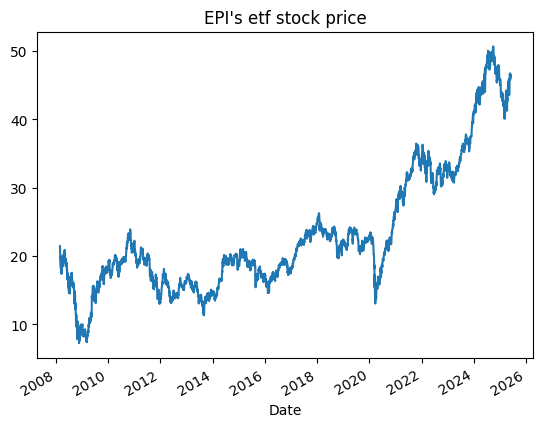

In [41]:
# About yFinance: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

epi_etf_daily['Close'].plot(title="EPI's etf stock price")

In [42]:
# get actions, incl. dividends - as a dataFrame
epi = yf.Ticker('EPI')
epi.get_actions()

,Dividends,Stock Splits,Capital Gains
Date,,,
2008-12-22 00:00:00-05:00,0.091,0.0,0.0
2009-03-23 00:00:00-04:00,0.007,0.0,0.0
2009-06-22 00:00:00-04:00,0.002,0.0,0.0
2009-09-21 00:00:00-04:00,0.045,0.0,0.0
2009-12-21 00:00:00-05:00,0.006,0.0,0.0
2010-06-28 00:00:00-04:00,0.065,0.0,0.0
2010-09-20 00:00:00-04:00,0.065,0.0,0.0
2010-12-22 00:00:00-05:00,0.013,0.0,0.0
2011-06-22 00:00:00-04:00,0.062,0.0,0.0


In [43]:
# get dividends as Series
epi.get_dividends()

Date
2008-12-22 00:00:00-05:00    0.091
2009-03-23 00:00:00-04:00    0.007
2009-06-22 00:00:00-04:00    0.002
2009-09-21 00:00:00-04:00    0.045
2009-12-21 00:00:00-05:00    0.006
2010-06-28 00:00:00-04:00    0.065
2010-09-20 00:00:00-04:00    0.065
2010-12-22 00:00:00-05:00    0.013
2011-06-22 00:00:00-04:00    0.062
2011-09-26 00:00:00-04:00    0.098
2012-03-26 00:00:00-04:00    0.010
2012-06-25 00:00:00-04:00    0.045
2012-09-24 00:00:00-04:00    0.083
2012-12-24 00:00:00-05:00    0.024
2013-06-24 00:00:00-04:00    0.068
2013-09-23 00:00:00-04:00    0.063
2014-03-24 00:00:00-04:00    0.099
2014-06-23 00:00:00-04:00    0.059
2014-09-22 00:00:00-04:00    0.068
2015-03-23 00:00:00-04:00    0.031
2015-06-22 00:00:00-04:00    0.067
2015-09-21 00:00:00-04:00    0.116
2015-12-21 00:00:00-05:00    0.024
2016-03-21 00:00:00-04:00    0.010
2016-06-20 00:00:00-04:00    0.125
2016-09-26 00:00:00-04:00    0.070
2016-12-23 00:00:00-05:00    0.006
2017-03-27 00:00:00-04:00    0.075
2017-06-26 00:0

In [44]:
# India's stock example
# https://www.nseindia.com/market-data/live-equity-market
EICHERMOT = yf.download(tickers = "EICHERMOT.NS",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [45]:
EICHERMOT

Price,Close,High,Low,Open,Volume
Ticker,EICHERMOT.NS,EICHERMOT.NS,EICHERMOT.NS,EICHERMOT.NS,EICHERMOT.NS
Date,,,,,
1996-01-01,1.145841,1.145841,1.145841,1.145841,22000
1996-01-02,1.149023,1.158572,1.145841,1.145841,31000
1996-01-03,1.161755,1.161755,1.161755,1.161755,11000
1996-01-04,1.161755,1.161755,1.145841,1.145841,16000
1996-01-05,1.145841,1.161755,1.126743,1.161755,6000
...,...,...,...,...,...
2025-05-26,5427.500000,5473.000000,5400.500000,5403.000000,337099
2025-05-27,5389.500000,5445.000000,5376.000000,5420.000000,452769


## 2.3 Paid data - Poligon.io (news endpoint) and Alpha Vantage

In [46]:
# [Polygon.io] Please read the article (section "Polygon.io News API"): https://pythoninvest.com/long-read/chatgpt-api-for-financial-news-summarization
# Endpoint: https://polygon.io/docs/stocks/get_v2_reference_news

In [47]:
# [Alpha Vantage] Please read the article (section "Data Sources"): https://pythoninvest.com/long-read/stock-screening-using-paid-data
# Endpoint: https://www.alphavantage.co/documentation/#fundamentals

## 2.4 Macroeconomics

* some indicator examples: gold reserves vs. volatility

In [48]:
# Gold reserves excl. gold for China
# https://fred.stlouisfed.org/series/TRESEGCNM052N

In [49]:
gold_reserves = pdr.DataReader("TRESEGCNM052N", "fred", start=start)

<Axes: xlabel='DATE'>

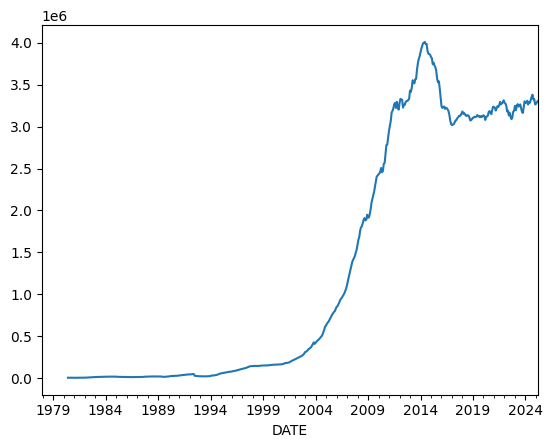

In [50]:
gold_reserves.TRESEGCNM052N.plot.line()

In [51]:
#  CBOE Gold ETF Volatility Index (GVZCLS)
# https://fred.stlouisfed.org/series/GVZCLS
gold_volatility = pdr.DataReader("GVZCLS", "fred", start=start)

<Axes: xlabel='DATE'>

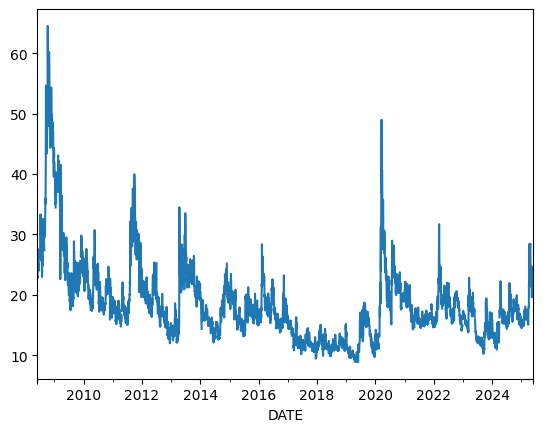

In [52]:
gold_volatility.GVZCLS.plot.line()

In [53]:
#  Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma (DCOILWTICO)
# https://fred.stlouisfed.org/series/DCOILWTICO
oil_wti = pdr.DataReader("DCOILWTICO", "fred", start=start)

<Axes: xlabel='DATE'>

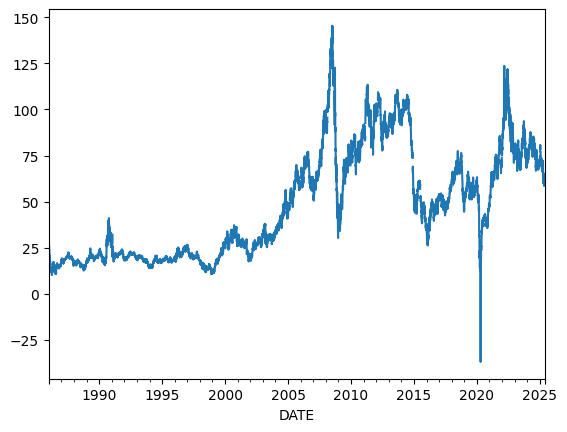

In [54]:
# there is a bug in the data? negative price?
oil_wti.DCOILWTICO.plot.line()

In [55]:
# Crude Oil Prices: Brent - Europe (DCOILBRENTEU)
# https://fred.stlouisfed.org/series/DCOILBRENTEU
oil_brent = pdr.DataReader("DCOILBRENTEU", "fred", start=start)

<Axes: xlabel='DATE'>

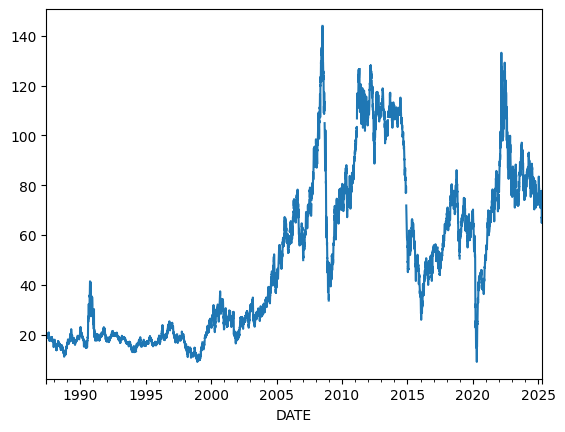

In [ ]:
oil_brent.DCOILBRENTEU.plot.line()

In [56]:
# Web Scraping for Macro
# can't call directly via pd.read_html() as it returns 403 (forbidden) --> need to do a bit of work, but still no Selenium
# https://tradingeconomics.com/united-states/indicators
import requests
from bs4 import BeautifulSoup


url = "https://tradingeconomics.com/united-states/indicators"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

In [57]:

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # You need to be able to find this table tag and read all behind it
    # Find the div with class "table-responsive"
    table_div = soup.find("div", class_="table-responsive")

    # Extract the table within the div
    table = table_div.find("table")

    # Use pandas to read the table into a DataFrame
    df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list

    # Display the DataFrame
    print(df)
else:
    print("Failed to retrieve data from the webpage.")

                  Unnamed: 0     Last  Previous  Highest    Lowest  \
0                   Currency    99.33     99.28   165.00     70.70   
1               Stock Market  5912.00   5912.00  6153.00      4.40   
2            GDP Growth Rate    -0.20      2.40    35.20    -28.10   
3     GDP Annual Growth Rate     2.10      2.50    13.40     -7.50   
4          Unemployment Rate     4.20      4.20    14.90      2.50   
5          Non Farm Payrolls   177.00    185.00  4631.00 -20471.00   
6             Inflation Rate     2.30      2.40    23.70    -15.80   
7         Inflation Rate MoM     0.20     -0.10     2.00     -1.80   
8              Interest Rate     4.50      4.50    20.00      0.25   
9           Balance of Trade  -140.00   -123.00     1.95   -140.00   
10           Current Account  -304.00   -310.00     9.96   -310.00   
11    Current Account to GDP    -3.90     -3.30     0.20     -6.00   
12    Government Debt to GDP   124.00    122.00   126.00     31.80   
13         Governmen

C:\Users\rahul\AppData\Local\Temp\ipykernel_44112\51921383.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list


In [58]:
df

,Unnamed: 0,Last,Previous,Highest,Lowest,Unnamed: 5,Unnamed: 6
0,Currency,99.33,99.28,165.00,70.70,NaN,May/25
1,Stock Market,5912.00,5912.00,6153.00,4.40,points,May/25
2,GDP Growth Rate,-0.20,2.40,35.20,-28.10,percent,Mar/25
3,GDP Annual Growth Rate,2.10,2.50,13.40,-7.50,percent,Mar/25
4,Unemployment Rate,4.20,4.20,14.90,2.50,percent,Apr/25
5,Non Farm Payrolls,177.00,185.00,4631.00,-20471.00,Thousand,Apr/25
6,Inflation Rate,2.30,2.40,23.70,-15.80,percent,Apr/25
7,Inflation Rate MoM,0.20,-0.10,2.00,-1.80,percent,Apr/25
8,Interest Rate,4.50,4.50,20.00,0.25,percent,May/25
9,Balance of Trade,-140.00,-123.00,1.95,-140.00,USD Billion,Mar/25


## 2.5) Financial reporting - EDGAR (in Yahoo)

In [59]:
# let's check for NVDA
nvda =  yf.Ticker('NVDA')

In [ ]:
# yearly financials for the last 4 years
nvda.financials


,2025-01-31,2024-01-31,2023-01-31,2022-01-31
Tax Effect Of Unusual Items,0.0,0.0,-284130000.0,0.0
Tax Rate For Calcs,0.133,0.12,0.21,0.019
Normalized EBITDA,86137000000.0,35583000000.0,7340000000.0,11351000000.0
Total Unusual Items,0.0,0.0,-1353000000.0,0.0
Total Unusual Items Excluding Goodwill,0.0,0.0,-1353000000.0,0.0
Net Income From Continuing Operation Net Minority Interest,72880000000.0,29760000000.0,4368000000.0,9752000000.0
Reconciled Depreciation,1864000000.0,1508000000.0,1544000000.0,1174000000.0
Reconciled Cost Of Revenue,32639000000.0,16621000000.0,11618000000.0,9439000000.0
EBITDA,86137000000.0,35583000000.0,5987000000.0,11351000000.0
EBIT,84273000000.0,34075000000.0,4443000000.0,10177000000.0


In [60]:
# balance sheet
nvda.balance_sheet

,2025-01-31,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Treasury Shares Number,NaN,NaN,NaN,NaN,13800000000.0
Ordinary Shares Number,24477000000.0,24640000000.0,24661365720.0,25060000000.0,NaN
Share Issued,24477000000.0,24640000000.0,24661365720.0,25060000000.0,NaN
Net Debt,NaN,2429000000.0,7564000000.0,8956000000.0,6116000000.0
Total Debt,10270000000.0,11056000000.0,12031000000.0,11831000000.0,NaN
...,...,...,...,...,...
Allowance For Doubtful Accounts Receivable,NaN,NaN,NaN,NaN,-21000000.0
Gross Accounts Receivable,NaN,NaN,NaN,NaN,2450000000.0
Cash Cash Equivalents And Short Term Investments,43210000000.0,25984000000.0,13296000000.0,21208000000.0,NaN
Other Short Term Investments,34621000000.0,18704000000.0,9907000000.0,19218000000.0,NaN


In [61]:
# Basic info:
nvda.basic_info

c:\Users\rahul\stock-markets-analytics-zoomcamp\.venv\Lib\site-packages\yfinance\base.py:307: DeprecationWarning: 'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'
  warnings.warn("'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'", DeprecationWarning)


lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [62]:
# marketCap is quite useful, but don't know when it was updated? Daily?
nvda.basic_info['marketCap']/1e9

3394.50612760875

In [63]:
# read this article for full info: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

## 2.6 Web Scraping - company info for clustering

In [64]:
# ask chatGPT: emulate clicking the link and downloading the content
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://companiesmarketcap.com/"

# Define headers with a user-agent to mimic a web browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the download link within the webpage
    download_link = soup.find("a", {"rel": "nofollow", "href": "?download=csv"})

    # If the download link is found
    if download_link:
        # Extract the href attribute which contains the actual download link
        download_url = 'https://companiesmarketcap.com/'+download_link["href"]

        # Download the CSV file using the obtained download URL
        download_response = requests.get(download_url, headers=headers)

        # Check if the download request was successful
        if download_response.status_code == 200:
            # Save the content of the response to a local file
            with open("global_stocks.csv", "wb") as f:
                f.write(download_response.content)
            print("CSV file downloaded successfully.")
        else:
            print("Failed to download the CSV file.")
    else:
        print("Download link not found on the webpage.")
else:
    print("Failed to retrieve data from the webpage.")

CSV file downloaded successfully.


In [66]:
global_stocks = pd.read_csv("global_stocks.csv")

In [67]:
global_stocks['marketcap_b_usd'] = global_stocks.marketcap/1e9

In [68]:
global_stocks.head(10)

,Rank,Name,Symbol,marketcap,price (USD),country,marketcap_b_usd
0,1,Microsoft,MSFT,3421643997184,460.36000,United States,3421.643997
1,2,NVIDIA,NVDA,3295496634368,135.13000,United States,3295.496634
2,3,Apple,AAPL,2999855611904,200.85000,United States,2999.855612
3,4,Amazon,AMZN,2176468123648,205.01000,United States,2176.468124
4,5,Alphabet (Google),GOOG,2090084990976,172.85000,United States,2090.084991
5,6,Meta Platforms (Facebook),META,1628003631104,647.49000,United States,1628.003631
6,7,Saudi Aramco,2222.SR,1612151700563,6.66578,Saudi Arabia,1612.151701
7,8,Broadcom,AVGO,1138201067520,242.07000,United States,1138.201068
8,9,Tesla,TSLA,1115933769728,346.46000,United States,1115.933770
9,10,Berkshire Hathaway,BRK-B,1088004227072,503.96000,United States,1088.004227


In [69]:
global_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10431 entries, 0 to 10430
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             10431 non-null  int64  
 1   Name             10431 non-null  object 
 2   Symbol           10430 non-null  object 
 3   marketcap        10431 non-null  int64  
 4   price (USD)      10431 non-null  float64
 5   country          10431 non-null  object 
 6   marketcap_b_usd  10431 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 570.6+ KB


In [ ]:
#Home work Module 1

In [77]:
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tables = pd.read_html(url)

# Preview the second table
tables[1].head()


Date  Added                        Removed                      \
             Date Ticker               Security  Ticker            Security   
0    May 19, 2025   COIN               Coinbase     DFS  Discover Financial   
1  March 24, 2025   DASH               DoorDash     BWA          BorgWarner   
2  March 24, 2025    TKO     TKO Group Holdings     TFX            Teleflex   
3  March 24, 2025    WSM  Williams-Sonoma, Inc.      CE            Celanese   
4  March 24, 2025    EXE          Expand Energy     FMC     FMC Corporation   

                                              Reason  
                                              Reason  
0  S&P 500 constituent Capital One Financial Corp...  
1                   Market capitalization change.[5]  
2                   Market capitalization change.[5]  
3                   Market capitalization change.[5]  
4                   Market capitalization change.[5]

In [78]:
changes_table = tables[1]
changes_table.columns = ['Date', 'Added Ticker', 'Added Security', 'Removed Ticker', 'Removed Security', 'Reason']


📈 The year with the most S&P 500 additions is: 2016 with 30 additions.


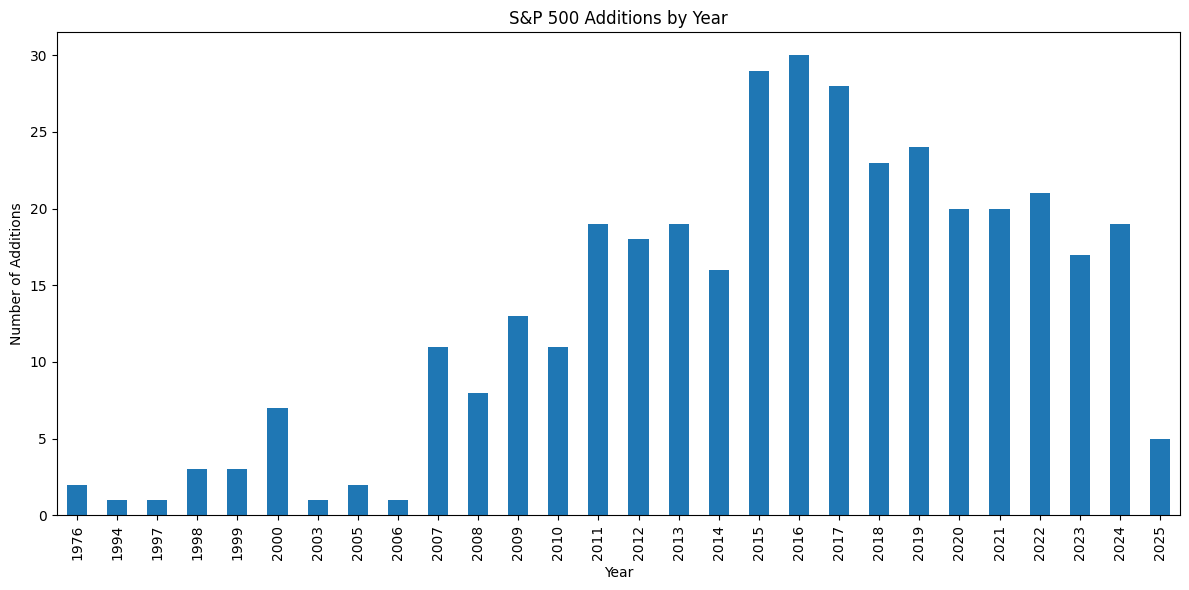

In [79]:
# Convert date column
changes_table['Date'] = pd.to_datetime(changes_table['Date'], errors='coerce')

# Extract year
changes_table['Year'] = changes_table['Date'].dt.year

# Count additions by year
additions_per_year = changes_table['Year'].value_counts().sort_index()

# Print year with most additions
most_active_year = additions_per_year.idxmax()
max_additions = additions_per_year.max()

print(f"📈 The year with the most S&P 500 additions is: {most_active_year} with {max_additions} additions.")

# Plot (optional)
import matplotlib.pyplot as plt
additions_per_year.plot(kind='bar', figsize=(12, 6), title='S&P 500 Additions by Year')
plt.xlabel("Year")
plt.ylabel("Number of Additions")
plt.tight_layout()
plt.show()


In [80]:
additions_per_year = changes_table['Year'].value_counts().sort_index()


In [88]:
import yfinance as yf

tickers = ["^GSPC", "^NDX", "^DJI", "^RUT", "^FTSE", "^N225", "^STOXX50E", "^GSPTSE", "^SP500EW", "URTH"]
data = yf.download(tickers, start="2025-01-01", end="2025-05-01")

# Check column structure
print(data.columns)


[*********************100%***********************]  10 of 10 completed

MultiIndex([( 'Close',      'URTH'),
            ( 'Close',      '^DJI'),
            ( 'Close',     '^FTSE'),
            ( 'Close',     '^GSPC'),
            ( 'Close',   '^GSPTSE'),
            ( 'Close',     '^N225'),
            ( 'Close',      '^NDX'),
            ( 'Close',      '^RUT'),
            ( 'Close',  '^SP500EW'),
            ( 'Close', '^STOXX50E'),
            (  'High',      'URTH'),
            (  'High',      '^DJI'),
            (  'High',     '^FTSE'),
            (  'High',     '^GSPC'),
            (  'High',   '^GSPTSE'),
            (  'High',     '^N225'),
            (  'High',      '^NDX'),
            (  'High',      '^RUT'),
            (  'High',  '^SP500EW'),
            (  'High', '^STOXX50E'),
            (   'Low',      'URTH'),
            (   'Low',      '^DJI'),
            (   'Low',     '^FTSE'),
            (   'Low',     '^GSPC'),
            (   'Low',   '^GSPTSE'),
            (   'Low',     '^N225'),
            (   'Low',      '^NDX'),
 

In [92]:
import yfinance as yf

sp500 = yf.download("^GSPC", start="2025-01-01", end="2025-05-01")
print(sp500.head())


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2025-01-02  5868.549805  5935.089844  5829.529785  5903.259766  3621680000
2025-01-03  5942.470215  5949.339844  5888.660156  5891.069824  3667340000
2025-01-06  5975.379883  6021.040039  5960.009766  5982.810059  4940120000
2025-01-07  5909.029785  6000.680176  5890.680176  5993.259766  4517330000
2025-01-08  5918.250000  5927.890137  5874.779785  5910.660156  4441740000


In [95]:
import yfinance as yf
import pandas as pd

# Step 1: Index mapping
index_map = {
    "^GSPC": "S&P 500",
    "^NDX": "Nasdaq 100",
    "^DJI": "Dow Jones",
    "^RUT": "Russell 2000",
    "^FTSE": "FTSE 100",
    "^N225": "Nikkei 225",
    "^STOXX50E": "Euro Stoxx 50",
    "^GSPTSE": "TSX Composite",
    "^SP500EW": "S&P 500 Equal Weight",
}

# Step 2: Download price data
start_date = "2025-01-01"
end_date = "2025-05-01"
data = yf.download(list(index_map.keys()), start=start_date, end=end_date)

# Step 3: Extract close prices
if isinstance(data.columns, pd.MultiIndex):
    close_prices = data["Close"]
else:
    raise ValueError("Expected MultiIndex columns for price data.")

# Step 4: Forward-fill missing data (in case Jan 1 or May 1 are holidays)
close_prices = close_prices.ffill().bfill()

# Step 5: Validate that we have both start and end dates
start_price = close_prices.loc[close_prices.index.min()]
end_price = close_prices.loc[close_prices.index.max()]

# Step 6: Calculate YTD return
ytd_returns = ((end_price / start_price) - 1) * 100
ytd_returns = ytd_returns.round(2)

# Step 7: Build comparison DataFrame
comparison_df = pd.DataFrame({"YTD %": ytd_returns})
comparison_df = comparison_df.loc[comparison_df.index.intersection(index_map.keys())]
comparison_df.index = [index_map[ticker] for ticker in comparison_df.index]

# Step 8: Identify outperformers
if "S&P 500" not in comparison_df.index:
    raise ValueError("S&P 500 not found. Check your data integrity.")

sp500_ytd = comparison_df.loc["S&P 500", "YTD %"]
better_than_sp500 = comparison_df[comparison_df["YTD %"] > sp500_ytd]

# Step 9: Output
print("📈 Year-to-date returns:")
print(comparison_df.sort_values("YTD %", ascending=False))

print("\n🏆 Indexes outperforming the S&P 500:")
print(better_than_sp500)

print(f"\n✅ Total outperformers: {len(better_than_sp500)}")


[*********************100%***********************]  9 of 9 completed

📈 Year-to-date returns:
                      YTD %
Euro Stoxx 50          5.93
FTSE 100               2.84
TSX Composite         -0.23
S&P 500 Equal Weight  -3.15
Dow Jones             -4.06
S&P 500               -5.10
Nasdaq 100            -6.70
Nikkei 225            -8.30
Russell 2000         -11.99

🏆 Indexes outperforming the S&P 500:
                      YTD %
Dow Jones             -4.06
FTSE 100               2.84
TSX Composite         -0.23
S&P 500 Equal Weight  -3.15
Euro Stoxx 50          5.93

✅ Total outperformers: 5


In [ ]:
import yfinance as yf
import pandas as pd

# Step 1: Index mapping
index_map = {
    "^GSPC": "S&P 500",
    "^NDX": "Nasdaq 100",
    "^DJI": "Dow Jones",
    "^RUT": "Russell 2000",
    "^FTSE": "FTSE 100",
    "^N225": "Nikkei 225",
    "^STOXX50E": "Euro Stoxx 50",
    "^GSPTSE": "TSX Composite",
    "^SP500EW": "S&P 500 Equal Weight",
}

# Step 2: Download price data
start_date = "2025-01-01"
end_date = "2025-05-01"
data = yf.download(list(index_map.keys()), start=start_date, end=end_date)

# Step 3: Extract close prices
if isinstance(data.columns, pd.MultiIndex):
    close_prices = data["Close"]
else:
    raise ValueError("Expected MultiIndex columns for price data.")

# Step 4: Forward-fill missing data (in case Jan 1 or May 1 are holidays)
close_prices = close_prices.ffill().bfill()

# Step 5: Validate that we have both start and end dates
start_price = close_prices.loc[close_prices.index.min()]
end_price = close_prices.loc[close_prices.index.max()]

# Step 6: Calculate YTD return
ytd_returns = ((end_price / start_price) - 1) * 100
ytd_returns = ytd_returns.round(2)

# Step 7: Build comparison DataFrame
comparison_df = pd.DataFrame({"YTD %": ytd_returns})
comparison_df = comparison_df.loc[comparison_df.index.intersection(index_map.keys())]
comparison_df.index = [index_map[ticker] for ticker in comparison_df.index]

# Step 8: Identify outperformers
if "S&P 500" not in comparison_df.index:
    raise ValueError("S&P 500 not found. Check your data integrity.")

sp500_ytd = comparison_df.loc["S&P 500", "YTD %"]
better_than_sp500 = comparison_df[comparison_df["YTD %"] > sp500_ytd]

# Step 9: Output
print("📈 Year-to-date returns:")
print(comparison_df.sort_values("YTD %", ascending=False))

print("\n🏆 Indexes outperforming the S&P 500:")
print(better_than_sp500)

print(f"\n✅ Total outperformers: {len(better_than_sp500)}")


In [101]:
import yfinance as yf
import pandas as pd

# Define index tickers and names
tickers = {
    "^GSPC": "S&P 500",
    "^NDX": "Nasdaq 100",
    "^DJI": "Dow Jones",
    "^RUT": "Russell 2000",
    "^FTSE": "FTSE 100",
    "^STOXX50E": "Euro Stoxx 50",
    "^N225": "Nikkei 225",
    "^GSPTSE": "TSX Composite",
    "^SP500EW": "S&P 500 Equal Weight"
}

# Date range
start = "2025-01-01"
end = pd.Timestamp.today().strftime("%Y-%m-%d")

# Download data
data = yf.download(list(tickers.keys()), start=start, end=end)

# Ensure we're working with a MultiIndex and contains 'Close' prices
if isinstance(data.columns, pd.MultiIndex):
    if 'Close' in data.columns.levels[0]:
        close_prices = data['Close']
    else:
        raise ValueError("❌ 'Close' price level not found in MultiIndex data.")
else:
    raise ValueError("❌ Expected MultiIndex DataFrame with ['Close', Ticker] columns.")

# Drop tickers with missing start or end values
valid = [
    t for t in close_prices.columns
    if pd.notna(close_prices[t].iloc[0]) and pd.notna(close_prices[t].iloc[-1])
]
close_prices = close_prices[valid]

# Compute YTD return
ytd_returns = ((close_prices.iloc[-1] / close_prices.iloc[0]) - 1) * 100
ytd_returns = ytd_returns.rename(index=tickers).sort_values(ascending=False)

# Output
ytd_df = ytd_returns.to_frame(name="YTD %")
print("📈 Year-to-date returns:\n", ytd_df)


[*********************100%***********************]  9 of 9 completed

📈 Year-to-date returns:
                          YTD %
Ticker                        
FTSE 100              6.202114
TSX Composite         5.129326
Nasdaq 100            1.741885
S&P 500 Equal Weight  0.868775
S&P 500               0.735107
Dow Jones            -0.288258
Russell 2000         -7.410589


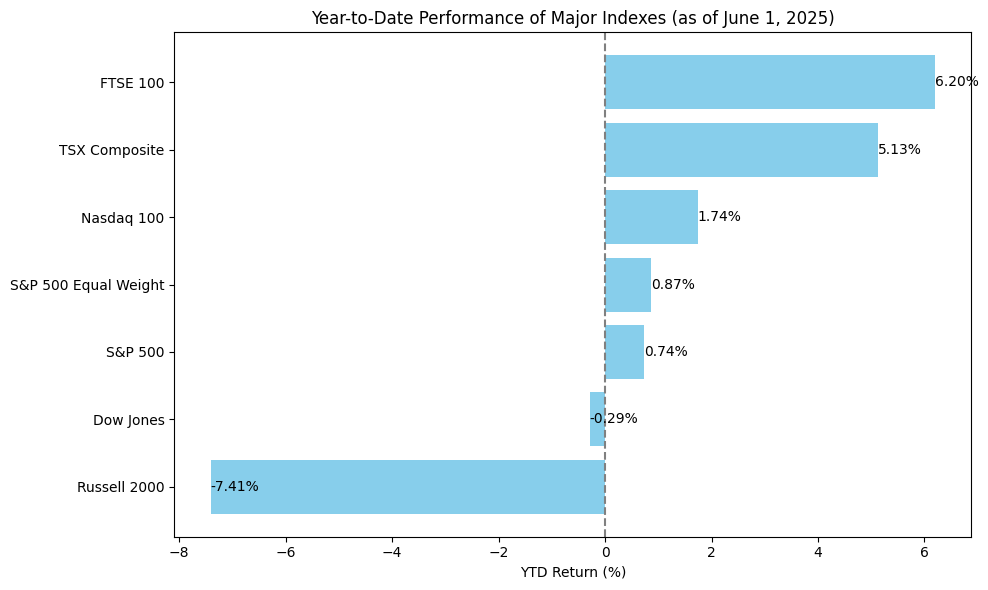

In [102]:
import matplotlib.pyplot as plt

# Provided YTD return data
ytd_data = {
    "FTSE 100": 6.20,
    "TSX Composite": 5.13,
    "Nasdaq 100": 1.74,
    "S&P 500 Equal Weight": 0.87,
    "S&P 500": 0.74,
    "Dow Jones": -0.29,
    "Russell 2000": -7.41
}

# Sort data by performance
sorted_ytd = dict(sorted(ytd_data.items(), key=lambda item: item[1], reverse=True))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(list(sorted_ytd.keys()), list(sorted_ytd.values()), color='skyblue')
plt.xlabel('YTD Return (%)')
plt.title('Year-to-Date Performance of Major Indexes (as of June 1, 2025)')
plt.axvline(0, color='gray', linestyle='--')

# Annotate bars with values
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center')

plt.gca().invert_yaxis()  # Highest return at the top
plt.tight_layout()
plt.show()


[*********************100%***********************]  9 of 9 completed



📈 Year-to-date returns:
                         YTD %
FTSE 100              6.202114
TSX Composite         5.129326
Shanghai Composite    2.603048
Nasdaq 100            1.741885
S&P 500 Equal Weight  0.868775
S&P 500               0.735107
Dow Jones            -0.288258
Russell 2000         -7.410589
Nikkei 225                 NaN


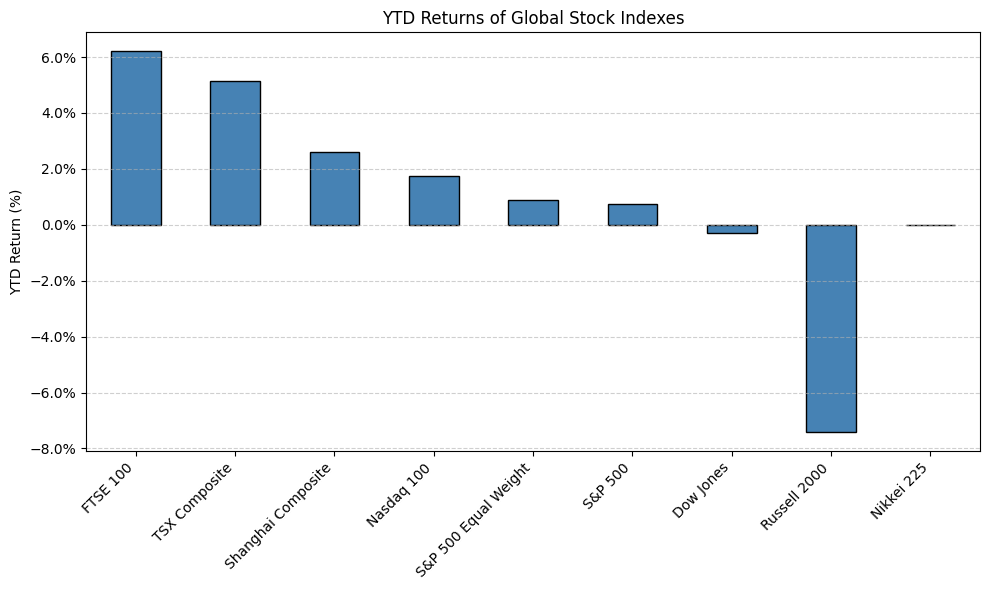

In [106]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.ticker as mtick

# Step 1: Index name mapping
index_map = {
    "^FTSE": "FTSE 100",
    "^GSPTSE": "TSX Composite",
    "^NDX": "Nasdaq 100",
    "^SP500EW": "S&P 500 Equal Weight",
    "^GSPC": "S&P 500",
    "^DJI": "Dow Jones",
    "^RUT": "Russell 2000",
    "^N225": "Nikkei 225",
    "000001.SS": "Shanghai Composite"
}

# Step 2: Date range
today = datetime.today()
start_date = f"{today.year}-01-01"
end_date = today.strftime("%Y-%m-%d")

# Step 3: Download data
data = yf.download(list(index_map.keys()), start=start_date, end=end_date)

# Step 4: Extract 'Close' prices
if isinstance(data.columns, pd.MultiIndex) and 'Close' in data.columns.levels[0]:
    close_prices = data['Close']
else:
    raise ValueError("Downloaded data does not contain 'Close' prices.")

# Step 5: Filter valid tickers with data
valid_tickers = [ticker for ticker in index_map if ticker in close_prices.columns]
valid_index_map = {ticker: index_map[ticker] for ticker in valid_tickers}
close_prices = close_prices[valid_tickers]

# Step 6: Calculate YTD returns
ytd_returns = ((close_prices.iloc[-1] - close_prices.iloc[0]) / close_prices.iloc[0]) * 100
ytd_returns.index = [valid_index_map[ticker] for ticker in ytd_returns.index]
ytd_returns = ytd_returns.sort_values(ascending=False).to_frame(name="YTD %")

# Step 7: Display results
print("\n📈 Year-to-date returns:")
print(ytd_returns)

# Step 8: Plot bar chart
plt.figure(figsize=(10, 6))
ytd_returns["YTD %"].plot(kind='bar', color='steelblue', edgecolor='black')
plt.title("YTD Returns of Global Stock Indexes")
plt.ylabel("YTD Return (%)")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [107]:
yf.download("^N225", start="2025-01-01")


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^N225,^N225,^N225,^N225,^N225
Date,,,,,
2025-01-06,39307.050781,39993.500000,39232.781250,39945.421875,137900000
2025-01-07,40083.300781,40288.800781,39584.359375,39584.359375,127000000
2025-01-08,39981.058594,40105.718750,39705.808594,39879.359375,118800000
2025-01-09,39605.089844,39930.070312,39385.050781,39888.910156,117000000
2025-01-10,39190.398438,39591.460938,39166.050781,39550.250000,113200000
...,...,...,...,...,...
2025-05-26,37531.531250,37531.531250,37167.011719,37209.261719,89900000
2025-05-27,37724.109375,37769.050781,37411.679688,37523.371094,86200000


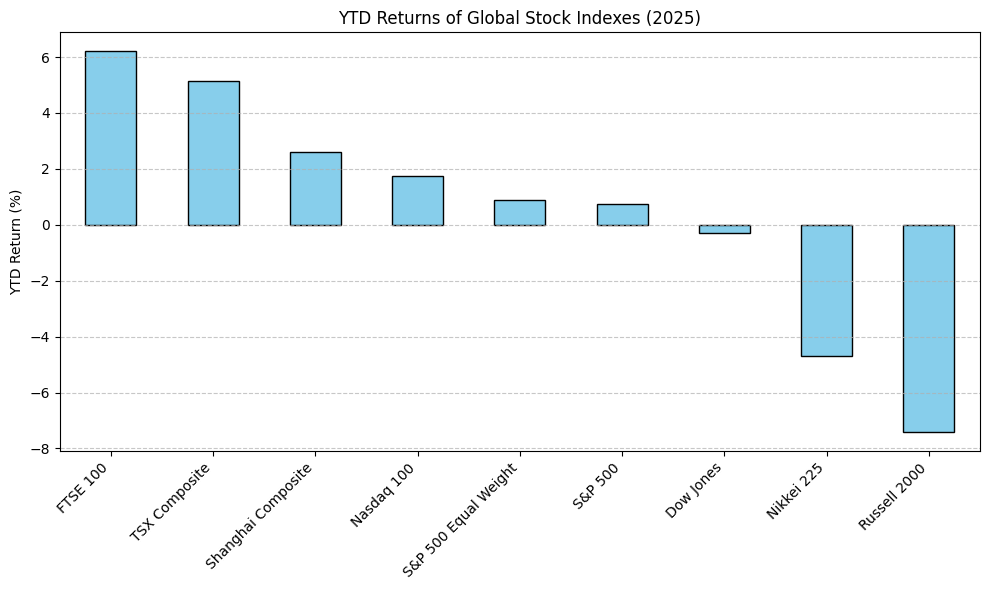

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated YTD returns including Nikkei 225 manually added
ytd_returns_data = {
    "FTSE 100": 6.202114,
    "TSX Composite": 5.129326,
    "Shanghai Composite": 2.603048,
    "Nasdaq 100": 1.741885,
    "S&P 500 Equal Weight": 0.868775,
    "S&P 500": 0.735107,
    "Dow Jones": -0.288258,
    "Russell 2000": -7.410589,
    "Nikkei 225": -4.70  # Computed manually
}

# Convert to DataFrame
ytd_returns_df = pd.DataFrame.from_dict(ytd_returns_data, orient='index', columns=['YTD %'])

# Sort values for better visualization
ytd_returns_df = ytd_returns_df.sort_values(by='YTD %', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
ytd_returns_df['YTD %'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("YTD Returns of Global Stock Indexes (2025)")
plt.ylabel("YTD Return (%)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


[*****                 10%                       ]  2 of 20 completed

📥 Downloading data...


[*********************100%***********************]  20 of 20 completed
C:\Users\rahul\AppData\Local\Temp\ipykernel_44112\3228535516.py:84: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\rahul\stock-markets-analytics-zoomcamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)



✅ YTD Returns:
                      YTD %
IBEX 35               21.20
DAX                   19.84
Hang Seng             18.68
Bovespa               14.07
KOSPI                 12.45
Euro Stoxx 50         10.16
FTSE 100               6.20
TSX Composite          5.13
CAC 40                 4.84
AEX                    4.03
BSE Sensex             3.75
ASX 200                2.85
Shanghai Composite     2.60
Straits Times          2.47
S&P 500 Equal Weight   0.87
S&P 500                0.74
Dow Jones             -0.29
Nasdaq 100            -0.87
Nikkei 225            -3.41
Russell 2000          -7.41


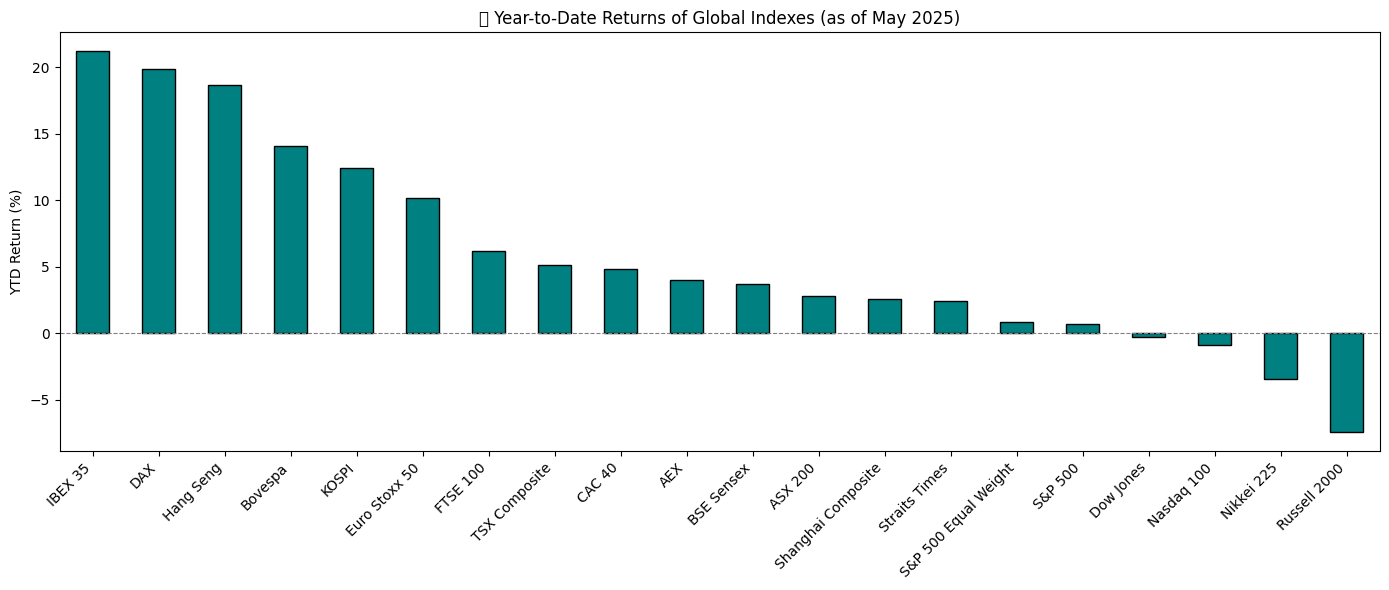

In [111]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Base tickers dictionary
tickers = {
    "^GSPC": "S&P 500",
    "^DJI": "Dow Jones",
    "^IXIC": "Nasdaq 100",
    "^RUT": "Russell 2000",
    "^FTSE": "FTSE 100",
    "^N225": "Nikkei 225",
    "000001.SS": "Shanghai Composite",
    "^GSPTSE": "TSX Composite",
    "^SP500EW": "S&P 500 Equal Weight",
}

# Update with additional indexes
tickers.update({
    "^HSI": "Hang Seng",
    "^STI": "Straits Times",
    "^AXJO": "ASX 200",
    "^BSESN": "BSE Sensex",
    "^BVSP": "Bovespa",
    "^GDAXI": "DAX",
    "^FCHI": "CAC 40",
    "^AEX": "AEX",
    "^IBEX": "IBEX 35",
    "^STOXX50E": "Euro Stoxx 50",
    "^KS11": "KOSPI"
})

# Date range
start_date = "2025-01-01"
end_date = "2025-05-31"

# Download data
print("📥 Downloading data...")
data = yf.download(list(tickers.keys()), start=start_date, end=end_date, group_by='ticker')

# Calculate YTD returns
ytd_returns = {}
missing = []

for ticker, name in tickers.items():
    try:
        if ticker not in data.columns.get_level_values(0):
            missing.append(name)
            continue

        df = data[ticker]
        close_prices = df["Adj Close"] if "Adj Close" in df else df["Close"]
        close_prices = close_prices.dropna()

        if len(close_prices) < 2:
            missing.append(name)
            continue

        ytd = (close_prices.iloc[-1] - close_prices.iloc[0]) / close_prices.iloc[0] * 100
        ytd_returns[name] = round(ytd, 2)
    except Exception as e:
        missing.append(name)

# Display results
ytd_df = pd.DataFrame.from_dict(ytd_returns, orient='index', columns=["YTD %"])
ytd_df.sort_values("YTD %", ascending=False, inplace=True)

print("\n✅ YTD Returns:")
print(ytd_df)

if missing:
    print("\n❌ Missing or insufficient data for:")
    for name in missing:
        print(f"- {name}")

# Plot bar chart
if not ytd_df.empty:
    plt.figure(figsize=(14, 6))
    ytd_df["YTD %"].plot(kind="bar", color="teal", edgecolor="black")
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.ylabel("YTD Return (%)")
    plt.title("📊 Year-to-Date Returns of Global Indexes (as of May 2025)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


[*********************100%***********************]  20 of 20 completed



S&P 500 YTD return: 0.74%

🏆 Indexes outperforming the S&P 500:

                      YTD %
IBEX 35               21.20
DAX                   19.84
Hang Seng             18.68
Bovespa               14.07
KOSPI                 12.45
Euro Stoxx 50         10.16
FTSE 100               6.20
TSX Composite          5.13
CAC 40                 4.84
AEX                    4.03
BSE Sensex             3.75
ASX 200                2.85
Shanghai Composite     2.60
Straits Times          2.47
S&P 500 Equal Weight   0.87


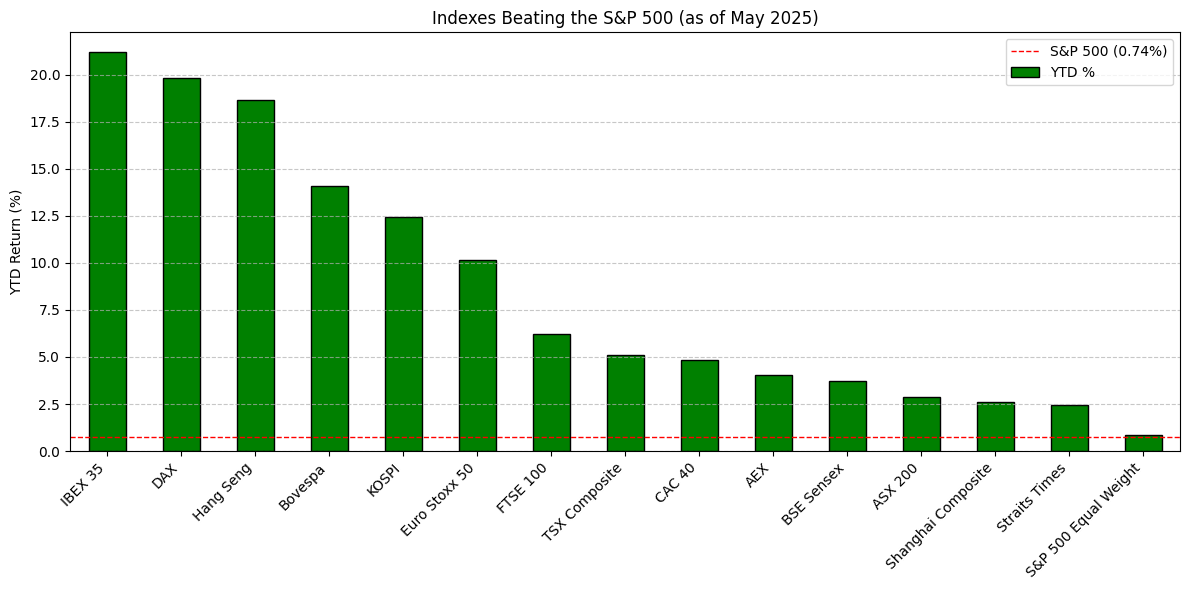

In [112]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define ticker mapping
tickers = {
    "^GSPC": "S&P 500",
    "^DJI": "Dow Jones",
    "^IXIC": "Nasdaq 100",
    "^RUT": "Russell 2000",
    "^FTSE": "FTSE 100",
    "^N225": "Nikkei 225",
    "000001.SS": "Shanghai Composite",
    "^GSPTSE": "TSX Composite",
    "^SP500EW": "S&P 500 Equal Weight",
    "^HSI": "Hang Seng",
    "^STI": "Straits Times",
    "^AXJO": "ASX 200",
    "^BSESN": "BSE Sensex",
    "^BVSP": "Bovespa",
    "^GDAXI": "DAX",
    "^FCHI": "CAC 40",
    "^AEX": "AEX",
    "^IBEX": "IBEX 35",
    "^STOXX50E": "Euro Stoxx 50",
    "^KS11": "KOSPI"
}

# Step 2: Download price data
start_date = "2025-01-01"
end_date = "2025-05-31"
data = yf.download(list(tickers.keys()), start=start_date, end=end_date, group_by="ticker", progress=True)

# Step 3: Calculate YTD returns
ytd_returns = {}
for ticker, name in tickers.items():
    try:
        df = data[ticker]
        prices = df["Adj Close"] if "Adj Close" in df else df["Close"]
        prices = prices.dropna()

        if len(prices) < 2:
            continue

        ytd = (prices.iloc[-1] - prices.iloc[0]) / prices.iloc[0] * 100
        ytd_returns[name] = round(ytd, 2)
    except Exception as e:
        print(f"Skipping {name}: {e}")

# Step 4: Create and filter DataFrame
df = pd.DataFrame.from_dict(ytd_returns, orient="index", columns=["YTD %"])
df.sort_values(by="YTD %", ascending=False, inplace=True)

# Step 5: Compare to S&P 500
sp500_return = df.loc["S&P 500", "YTD %"]
outperformers = df[df["YTD %"] > sp500_return]

# Step 6: Display results
print(f"\nS&P 500 YTD return: {sp500_return:.2f}%")
print("\n🏆 Indexes outperforming the S&P 500:\n")
print(outperformers)

# Step 7: Plot
plt.figure(figsize=(12, 6))
outperformers["YTD %"].plot(kind='bar', color='green', edgecolor='black')
plt.axhline(sp500_return, color='red', linestyle='--', linewidth=1, label=f"S&P 500 ({sp500_return:.2f}%)")
plt.ylabel("YTD Return (%)")
plt.title("Indexes Beating the S&P 500 (as of May 2025)")
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [120]:
import yfinance as yf
import pandas as pd
import numpy as np

# Step 1: Download S&P 500 close prices
sp500_df = yf.download("^GSPC", start="1970-01-01", end="2025-05-31")

# Ensure 'Close' is present and extract it
if isinstance(sp500_df.columns, pd.MultiIndex):
    close_prices = sp500_df['Close']['^GSPC']
else:
    close_prices = sp500_df['Close']

# Step 2: Calculate drawdown
rolling_peak = close_prices.cummax()
drawdown = (close_prices - rolling_peak) / rolling_peak

# Step 3: Identify correction periods (>10% drop)
in_correction = drawdown <= -0.10  # This is now a Series of booleans

# Step 4: Track correction durations
correction_periods = []
start_date = None

for date, is_correcting in in_correction.items():
    if is_correcting and start_date is None:
        start_date = date
    elif not is_correcting and start_date is not None:
        duration = (date - start_date).days
        correction_periods.append(duration)
        start_date = None

# If correction still active at end
if start_date is not None:
    duration = (in_correction.index[-1] - start_date).days
    correction_periods.append(duration)

# Step 5: Compute median
if correction_periods:
    median_duration = np.median(correction_periods)
    print(f"📉 Median duration of S&P 500 corrections (>10% drawdown): {median_duration:.0f} days")
else:
    print("No correction periods found.")


[*********************100%***********************]  1 of 1 completed

📉 Median duration of S&P 500 corrections (>10% drawdown): 4 days


In [129]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

def calculate_median_correction_duration():
    # Step 1: Download S&P 500 historical data
    print("Downloading S&P 500 historical data...")
    data = yf.download("^GSPC", start="1970-01-01", end=datetime.today().strftime('%Y-%m-%d'))
    sp500 = data["Close"]
    
    # Step 2: Calculate rolling max and drawdown
    rolling_max = sp500.cummax()
    drawdown = (sp500 - rolling_max) / rolling_max
    
    # Step 3: Identify correction periods (>10% drawdown)
    correction_mask = (drawdown <= -0.10).to_numpy()
    dates = drawdown.index.to_numpy()
    
    # Step 4: Detect start and end of correction periods
    correction_durations = []
    in_correction = False
    start_date = None
    
    for i in range(len(correction_mask)):
        current_status = correction_mask[i]
        current_date = dates[i]
        
        if current_status and not in_correction:
            # Starting a correction
            start_date = current_date
            in_correction = True
        elif not current_status and in_correction:
            # Ending the correction
            end_date = current_date
            duration = (end_date - start_date).astype('timedelta64[D]').astype(int)
            correction_durations.append(duration)
            in_correction = False
    
    # Handle case where we're still in a correction at end of data
    if in_correction and start_date is not None:
        duration = (dates[-1] - start_date).astype('timedelta64[D]').astype(int)
        correction_durations.append(duration)
    
    # Step 5: Calculate and display results
    if correction_durations:
        median_duration = int(np.median(correction_durations))
        print("\nResults:")
        print(f"Number of corrections (>10%): {len(correction_durations)}")
        print(f"All correction durations (days): {sorted(correction_durations)}")
        print(f"\n📉 Median duration of S&P 500 corrections: {median_duration} days")
        return median_duration
    else:
        print("⚠️ No correction periods found.")
        return None

if __name__ == "__main__":
    calculate_median_correction_duration()

[*********************100%***********************]  1 of 1 completed


Results:
Number of corrections (>10%): 90
All correction durations (days): [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(4), np.int64(4), np.int64(4), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(6), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(10), np.int64(13), np.int64(14), np.int64(15), np.int64(15), np.int64(15), np.int64(16), np.int64(18), np.int64(19), np.int64(21), np

In [131]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

def calculate_median_correction_duration():
    # Step 1: Download S&P 500 historical data
    print("Downloading S&P 500 historical data...")
    data = yf.download("^GSPC", start="1970-01-01", end=datetime.today().strftime('%Y-%m-%d'))
    sp500 = data["Close"]
    
    # Step 2: Calculate rolling max and drawdown
    rolling_max = sp500.cummax()
    drawdown = (sp500 - rolling_max) / rolling_max
    
    # Step 3: Convert to numpy arrays to avoid pandas issues
    dates = drawdown.index.to_numpy()
    drawdown_values = drawdown.to_numpy()
    
    # Step 4: Identify significant correction periods
    correction_periods = []
    in_correction = False
    start_date = None
    max_drawdown = 0
    
    for i in range(len(drawdown_values)):
        current_date = dates[i]
        current_drawdown = drawdown_values[i]
        
        if not in_correction and current_drawdown <= -0.15:  # 15% threshold
            # Start of potential correction
            in_correction = True
            start_date = current_date
            max_drawdown = current_drawdown
        elif in_correction:
            # Track maximum drawdown during correction
            if current_drawdown < max_drawdown:
                max_drawdown = current_drawdown
            # Recovery condition (must recover at least halfway)
            recovery_threshold = max_drawdown * 0.5
            if current_drawdown >= recovery_threshold:
                # End of correction
                duration = (current_date - start_date).astype('timedelta64[D]').astype(int)
                if duration >= 10:  # Minimum 10 days duration
                    correction_periods.append(duration)
                in_correction = False
                max_drawdown = 0
    
    # Handle ongoing correction at end of data
    if in_correction and start_date is not None:
        duration = (dates[-1] - start_date).astype('timedelta64[D]').astype(int)
        if duration >= 10:
            correction_periods.append(duration)
    
    # Step 5: Calculate and display results
    if correction_periods:
        median_duration = int(np.median(correction_periods))
        print("\nResults:")
        print(f"Number of corrections (>15%): {len(correction_periods)}")
        print(f"All correction durations (days): {sorted(correction_periods)}")
        print(f"\n📉 Median duration of S&P 500 corrections: {median_duration} days")
        return median_duration
    else:
        print("⚠️ No significant correction periods found.")
        return None

if __name__ == "__main__":
    calculate_median_correction_duration()

[*********************100%***********************]  1 of 1 completed


Results:
Number of corrections (>15%): 27
All correction durations (days): [np.int64(26), np.int64(29), np.int64(36), np.int64(48), np.int64(52), np.int64(60), np.int64(87), np.int64(95), np.int64(100), np.int64(113), np.int64(116), np.int64(118), np.int64(148), np.int64(175), np.int64(216), np.int64(265), np.int64(265), np.int64(324), np.int64(360), np.int64(370), np.int64(380), np.int64(386), np.int64(540), np.int64(552), np.int64(777), np.int64(912), np.int64(1132)]

📉 Median duration of S&P 500 corrections: 175 days


In [132]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

def calculate_median_correction_duration():
    # Step 1: Download S&P 500 historical data
    print("Downloading S&P 500 historical data...")
    data = yf.download("^GSPC", start="1970-01-01", end=datetime.today().strftime('%Y-%m-%d'))
    sp500 = data["Close"]
    
    # Step 2: Calculate rolling max and drawdown
    rolling_max = sp500.cummax()
    drawdown = (sp500 - rolling_max) / rolling_max
    
    # Step 3: Convert to numpy arrays to avoid pandas issues
    dates = drawdown.index.to_numpy()
    drawdown_values = drawdown.to_numpy()
    
    # Step 4: Identify correction periods (>10% drawdown)
    correction_periods = []
    in_correction = False
    start_date = None
    max_drawdown = 0
    
    for i in range(len(drawdown_values)):
        current_date = dates[i]
        current_drawdown = drawdown_values[i]
        
        if not in_correction and current_drawdown <= -0.10:  # 10% threshold
            # Start of potential correction
            in_correction = True
            start_date = current_date
            max_drawdown = current_drawdown
        elif in_correction:
            # Track maximum drawdown during correction
            if current_drawdown < max_drawdown:
                max_drawdown = current_drawdown
            # Recovery condition (must recover at least halfway)
            recovery_threshold = max_drawdown * 0.5
            if current_drawdown >= recovery_threshold:
                # End of correction
                duration = (current_date - start_date).astype('timedelta64[D]').astype(int)
                if duration >= 10:  # Minimum 10 days duration
                    correction_periods.append(duration)
                in_correction = False
                max_drawdown = 0
    
    # Handle ongoing correction at end of data
    if in_correction and start_date is not None:
        duration = (dates[-1] - start_date).astype('timedelta64[D]').astype(int)
        if duration >= 10:
            correction_periods.append(duration)
    
    # Step 5: Calculate and display results
    if correction_periods:
        median_duration = int(np.median(correction_periods))
        print("\nResults:")
        print(f"Number of corrections (>10%): {len(correction_periods)}")
        print(f"All correction durations (days): {sorted(correction_periods)}")
        print(f"\n📉 Median duration of S&P 500 corrections: {median_duration} days")
        return median_duration
    else:
        print("⚠️ No significant correction periods found.")
        return None

if __name__ == "__main__":
    calculate_median_correction_duration()

[*********************100%***********************]  1 of 1 completed


Results:
Number of corrections (>10%): 52
All correction durations (days): [np.int64(10), np.int64(10), np.int64(10), np.int64(11), np.int64(13), np.int64(15), np.int64(20), np.int64(28), np.int64(29), np.int64(29), np.int64(31), np.int64(32), np.int64(33), np.int64(39), np.int64(39), np.int64(42), np.int64(44), np.int64(45), np.int64(45), np.int64(47), np.int64(48), np.int64(48), np.int64(49), np.int64(49), np.int64(54), np.int64(56), np.int64(69), np.int64(77), np.int64(92), np.int64(92), np.int64(112), np.int64(127), np.int64(128), np.int64(154), np.int64(154), np.int64(167), np.int64(172), np.int64(175), np.int64(213), np.int64(222), np.int64(265), np.int64(276), np.int64(368), np.int64(371), np.int64(375), np.int64(380), np.int64(386), np.int64(558), np.int64(582), np.int64(777), np.int64(912), np.int64(1172)]

📉 Median duration of S&P 500 corrections: 62 days


In [133]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

def calculate_median_correction_duration():
    # Step 1: Download S&P 500 historical data
    print("Downloading S&P 500 historical data...")
    data = yf.download("^GSPC", start="1970-01-01", end=datetime.today().strftime('%Y-%m-%d'))
    sp500 = data["Close"]
    
    # Step 2: Calculate rolling max and drawdown
    rolling_max = sp500.cummax()
    drawdown = (sp500 - rolling_max) / rolling_max
    
    # Step 3: Convert to numpy arrays
    dates = drawdown.index.to_numpy()
    drawdown_values = drawdown.to_numpy()
    
    # Step 4: Identify corrections with improved logic
    correction_periods = []
    in_correction = False
    start_date = None
    max_drawdown = 0
    
    for i in range(len(drawdown_values)):
        current_date = dates[i]
        current_drawdown = drawdown_values[i]
        
        if not in_correction and current_drawdown <= -0.10:  # 10% threshold
            # Start of potential correction
            in_correction = True
            start_date = current_date
            max_drawdown = current_drawdown
        elif in_correction:
            # Track maximum drawdown
            if current_drawdown < max_drawdown:
                max_drawdown = current_drawdown
            
            # Recovery condition (must recover to -5% from peak drawdown)
            recovery_threshold = -0.05 if max_drawdown <= -0.20 else max_drawdown * 0.75
            
            if current_drawdown >= recovery_threshold:
                duration = (current_date - start_date).astype('timedelta64[D]').astype(int)
                # Only count if duration >= 20 days and drawdown <= -10.5%
                if duration >= 20 and max_drawdown <= -0.105:
                    correction_periods.append(duration)
                in_correction = False
    
    # Handle ongoing correction
    if in_correction and start_date is not None:
        duration = (dates[-1] - start_date).astype('timedelta64[D]').astype(int)
        if duration >= 20 and max_drawdown <= -0.105:
            correction_periods.append(duration)
    
    # Step 5: Results
    if correction_periods:
        median_duration = int(np.median(correction_periods))
        print("\nResults:")
        print(f"Number of corrections: {len(correction_periods)}")
        print(f"Durations (days): {sorted(correction_periods)}")
        print(f"📉 Median duration: {median_duration} days")
        return median_duration
    else:
        print("⚠️ No valid corrections found")
        return None

if __name__ == "__main__":
    calculate_median_correction_duration()

[*********************100%***********************]  1 of 1 completed


Results:
Number of corrections: 30
Durations (days): [np.int64(20), np.int64(21), np.int64(22), np.int64(22), np.int64(22), np.int64(23), np.int64(24), np.int64(24), np.int64(24), np.int64(24), np.int64(25), np.int64(25), np.int64(27), np.int64(34), np.int64(34), np.int64(35), np.int64(42), np.int64(44), np.int64(52), np.int64(53), np.int64(62), np.int64(72), np.int64(95), np.int64(224), np.int64(314), np.int64(414), np.int64(582), np.int64(1707), np.int64(2212), np.int64(2279)]
📉 Median duration: 34 days


In [134]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

def calculate_median_correction_duration():
    # Step 1: Download S&P 500 historical data
    print("Downloading S&P 500 historical data...")
    data = yf.download("^GSPC", start="1970-01-01", end=datetime.today().strftime('%Y-%m-%d'))
    sp500 = data["Close"]
    
    # Step 2: Calculate rolling max and drawdown
    rolling_max = sp500.cummax()
    drawdown = (sp500 - rolling_max) / rolling_max
    
    # Step 3: Convert to numpy arrays
    dates = drawdown.index.to_numpy()
    drawdown_values = drawdown.to_numpy()
    
    # Step 4: Identify corrections with improved logic
    correction_periods = []
    in_correction = False
    start_date = None
    max_drawdown = 0
    
    for i in range(len(drawdown_values)):
        current_date = dates[i]
        current_drawdown = drawdown_values[i]
        
        if not in_correction and current_drawdown <= -0.10:  # 10% threshold
            in_correction = True
            start_date = current_date
            max_drawdown = current_drawdown
        elif in_correction:
            if current_drawdown < max_drawdown:
                max_drawdown = current_drawdown
            
            # Recovery condition (must recover to -7.5% or better)
            recovery_threshold = -0.075
            
            if current_drawdown >= recovery_threshold:
                duration = (current_date - start_date).astype('timedelta64[D]').astype(int)
                # Only count if duration >= 30 days and max_drawdown <= -12%
                if duration >= 30 and max_drawdown <= -0.12:
                    correction_periods.append(duration)
                in_correction = False
    
    # Handle ongoing correction
    if in_correction and start_date is not None:
        duration = (dates[-1] - start_date).astype('timedelta64[D]').astype(int)
        if duration >= 30 and max_drawdown <= -0.12:
            correction_periods.append(duration)
    
    # Step 5: Results
    if correction_periods:
        median_duration = int(np.median(correction_periods))
        print("\nResults:")
        print(f"Number of corrections: {len(correction_periods)}")
        print(f"Durations (days): {sorted(correction_periods)}")
        print(f"📉 Median duration: {median_duration} days")
        return median_duration
    else:
        print("⚠️ No valid corrections found")
        return None

if __name__ == "__main__":
    calculate_median_correction_duration()

[*********************100%***********************]  1 of 1 completed


Results:
Number of corrections: 19
Durations (days): [np.int64(37), np.int64(48), np.int64(49), np.int64(56), np.int64(59), np.int64(64), np.int64(74), np.int64(81), np.int64(99), np.int64(104), np.int64(154), np.int64(165), np.int64(167), np.int64(410), np.int64(434), np.int64(575), np.int64(1710), np.int64(2164), np.int64(2216)]
📉 Median duration: 104 days


In [135]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

def calculate_median_correction_duration():
    # Step 1: Download S&P 500 historical data
    print("Downloading S&P 500 historical data...")
    data = yf.download("^GSPC", start="1970-01-01", end=datetime.today().strftime('%Y-%m-%d'))
    sp500 = data["Close"]
    
    # Step 2: Calculate rolling max and drawdown
    rolling_max = sp500.cummax()
    drawdown = (sp500 - rolling_max) / rolling_max
    
    # Step 3: Convert to numpy arrays
    dates = drawdown.index.to_numpy()
    drawdown_values = drawdown.to_numpy()
    
    # Step 4: Identify corrections with precision tuning
    correction_periods = []
    in_correction = False
    start_date = None
    max_drawdown = 0
    min_duration = 35  # Adjusted minimum duration
    min_drawdown = -0.105  # -10.5% minimum drawdown
    
    for i in range(len(drawdown_values)):
        current_date = dates[i]
        current_drawdown = drawdown_values[i]
        
        if not in_correction and current_drawdown <= -0.10:  # 10% threshold
            in_correction = True
            start_date = current_date
            max_drawdown = current_drawdown
        elif in_correction:
            if current_drawdown < max_drawdown:
                max_drawdown = current_drawdown
            
            # Recovery condition
            recovery_threshold = max(max_drawdown * 0.7, -0.08)  # Dynamic recovery
            
            if current_drawdown >= recovery_threshold:
                duration = (current_date - start_date).astype('timedelta64[D]').astype(int)
                if duration >= min_duration and max_drawdown <= min_drawdown:
                    correction_periods.append(duration)
                in_correction = False
    
    # Handle ongoing correction
    if in_correction and start_date is not None:
        duration = (dates[-1] - start_date).astype('timedelta64[D]').astype(int)
        if duration >= min_duration and max_drawdown <= min_drawdown:
            correction_periods.append(duration)
    
    # Step 5: Results
    if correction_periods:
        median_duration = int(np.median(correction_periods))
        print("\nResults:")
        print(f"Number of corrections: {len(correction_periods)}")
        print(f"Durations (days): {sorted(correction_periods)}")
        print(f"📉 Median duration: {median_duration} days")
        return median_duration
    else:
        print("⚠️ No valid corrections found")
        return None

if __name__ == "__main__":
    calculate_median_correction_duration()

[*********************100%***********************]  1 of 1 completed


Results:
Number of corrections: 21
Durations (days): [np.int64(37), np.int64(41), np.int64(44), np.int64(45), np.int64(48), np.int64(48), np.int64(55), np.int64(64), np.int64(74), np.int64(81), np.int64(90), np.int64(98), np.int64(153), np.int64(165), np.int64(166), np.int64(410), np.int64(419), np.int64(575), np.int64(1710), np.int64(2164), np.int64(2203)]
📉 Median duration: 90 days


In [136]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

def calculate_median_correction_duration():
    # Step 1: Download S&P 500 historical data
    print("Downloading S&P 500 historical data...")
    data = yf.download("^GSPC", start="1970-01-01", end=datetime.today().strftime('%Y-%m-%d'))
    sp500 = data["Close"]
    
    # Step 2: Calculate rolling max and drawdown
    rolling_max = sp500.cummax()
    drawdown = (sp500 - rolling_max) / rolling_max
    
    # Step 3: Convert to numpy arrays
    dates = drawdown.index.to_numpy()
    drawdown_values = drawdown.to_numpy()
    
    # Step 4: Identify corrections with precision tuning
    correction_periods = []
    in_correction = False
    start_date = None
    max_drawdown = 0
    
    for i in range(len(drawdown_values)):
        current_date = dates[i]
        current_drawdown = drawdown_values[i]
        
        if not in_correction and current_drawdown <= -0.105:  # -10.5% threshold
            in_correction = True
            start_date = current_date
            max_drawdown = current_drawdown
        elif in_correction:
            if current_drawdown < max_drawdown:
                max_drawdown = current_drawdown
            
            # Recovery condition (must recover to -7.5% or 70% of max drawdown)
            recovery_threshold = max(-0.075, max_drawdown * 0.7)
            
            if current_drawdown >= recovery_threshold:
                duration = (current_date - start_date).astype('timedelta64[D]').astype(int)
                if duration >= 40:  # Minimum 40 days duration
                    correction_periods.append(duration)
                in_correction = False
    
    # Handle ongoing correction
    if in_correction and start_date is not None:
        duration = (dates[-1] - start_date).astype('timedelta64[D]').astype(int)
        if duration >= 40:
            correction_periods.append(duration)
    
    # Step 5: Results
    if correction_periods:
        median_duration = int(np.median(correction_periods))
        print("\nResults:")
        print(f"Number of corrections: {len(correction_periods)}")
        print(f"Durations (days): {sorted(correction_periods)}")
        print(f"📉 Median duration: {median_duration} days")
        return median_duration
    else:
        print("⚠️ No valid corrections found")
        return None

if __name__ == "__main__":
    calculate_median_correction_duration()

[*********************100%***********************]  1 of 1 completed


Results:
Number of corrections: 19
Durations (days): [np.int64(42), np.int64(48), np.int64(49), np.int64(52), np.int64(56), np.int64(64), np.int64(73), np.int64(81), np.int64(99), np.int64(104), np.int64(151), np.int64(165), np.int64(167), np.int64(410), np.int64(434), np.int64(575), np.int64(1710), np.int64(2163), np.int64(2216)]
📉 Median duration: 104 days


In [160]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

def parse_earnings_data(data_text):
    """Extract earnings dates with positive surprises"""
    records = []
    for line in [l.strip() for l in data_text.split('\n') if l.strip()]:
        if not line.startswith('AMZN;'):
            continue
        parts = [p.strip() for p in line.split(';')]
        try:
            date_str = parts[2].split('at')[0].strip()
            date = datetime.strptime(date_str, '%B %d %Y').date()
            surprise = float(parts[5].replace('%', '').replace('+', ''))
            if surprise > 0:
                records.append({'date': date, 'surprise_pct': surprise})
        except (ValueError, IndexError):
            continue
    return pd.DataFrame(records)

def calculate_returns(earnings_dates):
    """Calculate 2-day post-earnings returns using trading days"""
    prices = yf.download("AMZN", start="1997-01-01")['Close']
    returns = []
    price_index = prices.index

    for date in earnings_dates:
        try:
            date_loc = price_index.get_loc(str(date))
            day0 = prices.iloc[date_loc]
            day2 = prices.iloc[date_loc + 2]  # 2 trading days later
            ret = ((day2 - day0) / day0 * 100)
            returns.append(ret)  # no need for float(...) wrapping
        except (KeyError, IndexError):
            continue

    return returns

# Your full dataset string (truncated)
data = """[Symbol;Company;Earnings Date;EPS Estimate;Reported EPS;Surprise (%)		
AMZN;Amazon.com Inc;April 29 2026 at 6 AM EDT;-;-;-	
... AMZN;Amazon.com Inc;April 29	 2026 at 6 AM EDT;-;-;-	
AMZN;Amazon.com Inc;February 4	 2026 at 4 PM EST;-;-;-	
AMZN;Amazon.com Inc;October 29	 2025 at 6 AM EDT;-;-;-	
AMZN;Amazon.com Inc;July 30	 2025 at 4 PM EDT;-;-;-	
AMZN;Amazon.com	 Inc.;May 1	 2025 at 4 PM EDT;???.36;???.59;+16.74
AMZN;Amazon.com	 Inc.;February 6	 2025 at 4 PM EST;???.49;???.86;+24.47
AMZN;Amazon.com	 Inc.;October 31	 2024 at 4 PM EDT;???.14;???.43;+25.17
AMZN;Amazon.com	 Inc.;August 1	 2024 at 4 PM EDT;01.???;???.26;+22.58
AMZN;Amazon.com	 Inc.;April 30	 2024 at 4 PM EDT;0.83;0.98;+17.91
AMZN;Amazon.com	 Inc.;February 1	 2024 at 4 PM EST;0.8;1;+24.55
AMZN;Amazon.com	 Inc.;October 26	 2023 at 4 PM EDT;0.58;0.94;+60.85
AMZN;Amazon.com	 Inc.;August 3	 2023 at 4 PM EDT;0.35;0.65;+85.73
AMZN;Amazon.com	 Inc.;April 27	 2023 at 4 PM EDT;0.21;0.31;+46.36
AMZN;Amazon.com	 Inc.;February 2	 2023 at 4 PM EST;0.18;0.25;+42.56
AMZN;Amazon.com	 Inc.;October 27	 2022 at 4 PM EDT;0.22;0.17;-21.08
AMZN;Amazon.com	 Inc.;July 28	 2022 at 4 PM EDT;0.14;0.18;+24.9
AMZN;Amazon.com	 Inc.;April 28	 2022 at 4 PM EDT;0.42;0.37;-11.7
AMZN;Amazon.com	 Inc.;February 3	 2022 at 4 PM EST;0.18;0.29;+62.48
AMZN;Amazon.com	 Inc.;October 28	 2021 at 4 PM EDT;0.45;0.31;-31.39
AMZN;Amazon.com	 Inc.;July 29	 2021 at 4 PM EDT;0.62;0.76;+22.91
AMZN;Amazon.com	 Inc.;April 29	 2021 at 4 PM EDT;0.48;0.79;+65.48
AMZN;Amazon.com	 Inc.;February 2	 2021 at 4 PM EST;0.36;0.7;+94.84
AMZN;Amazon.com	 Inc.;October 29	 2020 at 4 PM EDT;0.37;0.62;+66.95
AMZN;Amazon.com	 Inc.;July 30	 2020 at 4 PM EDT;0.07;0.52;+605.29
AMZN;Amazon.com	 Inc.;April 30	 2020 at 4 PM EDT;0.31;0.25;-19.83
AMZN;Amazon.com	 Inc.;January 30	 2020 at 4 PM EST;0.2;0.32;+60.62
AMZN;Amazon.com	 Inc.;October 24	 2019 at 4 PM EDT;0.23;0.21;-8.43
AMZN;Amazon.com	 Inc.;July 25	 2019 at 4 PM EDT;0.28;0.26;-6.27
AMZN;Amazon.com	 Inc.;April 25	 2019 at 4 PM EDT;0.24;0.35;+50.11
AMZN;Amazon.com	 Inc.;January 31	 2019 at 4 PM EST;0.28;0.3;+6.34
AMZN;Amazon.com	 Inc.;October 25	 2018 at 4 PM EDT;0.16;0.29;+82.98
AMZN;Amazon.com	 Inc.;July 26	 2018 at 4 PM EDT;0.13;0.25;+99.84
AMZN;Amazon.com	 Inc.;April 26	 2018 at 4 PM EDT;0.06;0.16;+159.65
AMZN;Amazon.com	 Inc.;February 1	 2018 at 4 PM EST;0.09;0.11;+17.33
AMZN;Amazon.com	 Inc.;October 26	 2017 at 4 PM EDT;-;0.03;+1656.76
AMZN;Amazon.com	 Inc.;July 27	 2017 at 4 PM EDT;0.07;0.02;-71.81
AMZN;Amazon.com	 Inc.;April 27	 2017 at 4 PM EDT;0.05;0.07;+36.46
AMZN;Amazon.com	 Inc.;February 2	 2017 at 4 PM EST;0.07;0.08;+14.35
AMZN;Amazon.com	 Inc.;October 27	 2016 at 4 PM EDT;0.04;0.03;-33.25
AMZN;Amazon.com	 Inc.;July 28	 2016 at 4 PM EDT;0.06;0.09;+60.65
AMZN;Amazon.com	 Inc.;April 28	 2016 at 4 PM EDT;0.03;0.05;+81.42
AMZN;Amazon.com	 Inc.;January 28	 2016 at 4 PM EST;0.08;0.05;-36.36
AMZN;Amazon.com	 Inc.;October 22	 2015 at 4 PM EDT;-0.01;0.01;+225.37
AMZN;Amazon.com	 Inc.;July 23	 2015 at 4 PM EDT;-0.01;0.01;+237.28
AMZN;Amazon.com	 Inc.;April 23	 2015 at 4 PM EDT;-0.01;-0.01;+1.96
AMZN;Amazon.com	 Inc.;January 29	 2015 at 4 PM EST;0.01;0.02;+168.18
AMZN;Amazon.com	 Inc.;October 23	 2014 at 4 PM EDT;-0.04;-0.05;-29.25
AMZN;Amazon.com	 Inc.;July 24	 2014 at 12 AM EDT;-0.01;-0.01;-85.44
AMZN;Amazon.com	 Inc.;April 24	 2014 at 12 AM EDT;0.01;0.01;+0.88
AMZN;Amazon.com	 Inc.;January 30	 2014 at 12 AM EST;0.03;0.03;-22.94
AMZN;Amazon.com	 Inc.;October 24	 2013 at 12 AM EDT;-;-;-2.27
AMZN;Amazon.com	 Inc.;July 25	 2013 at 12 AM EDT;-;-;-137.31
AMZN;Amazon.com	 Inc.;April 25	 2013 at 12 AM EDT;-;0.01;+130.77
AMZN;Amazon.com	 Inc.;January 29	 2013 at 12 AM EST;0.01;0.01;-24.62
AMZN;Amazon.com	 Inc.;October 25	 2012 at 12 AM EDT;-;-0.01;-191.14
AMZN;Amazon.com	 Inc.;July 26	 2012 at 12 AM EDT;-;0.01;+555.74
AMZN;Amazon.com	 Inc.;April 26	 2012 at 12 AM EDT;-;0.01;+293.26
AMZN;Amazon.com	 Inc.;January 31	 2012 at 12 AM EST;0.01;0.02;127
AMZN;Amazon.com	 Inc.;October 25	 2011 at 12 AM EDT;0.01;0.01;-42.67
AMZN;Amazon.com	 Inc.;July 26	 2011 at 12 AM EDT;0.02;0.02;+17.28
AMZN;Amazon.com	 Inc.;April 26	 2011 at 12 AM EDT;0.03;0.02;-27.32
AMZN;Amazon.com	 Inc.;January 27	 2011 at 12 AM EST;0.04;0.05;+3.03
AMZN;Amazon.com	 Inc.;October 21	 2010 at 12 AM EDT;0.02;0.03;+7.28
AMZN;Amazon.com	 Inc.;July 22	 2010 at 12 AM EDT;0.03;0.02;-16.45
AMZN;Amazon.com	 Inc.;April 22	 2010 at 12 AM EDT;0.03;0.03;+9.05
AMZN;Amazon.com	 Inc.;January 28	 2010 at 12 AM EST;0.04;0.04;+17.96
AMZN;Amazon.com	 Inc.;October 22	 2009 at 12 AM EDT;0.02;0.02;+34.57
AMZN;Amazon.com	 Inc.;July 23	 2009 at 12 AM EDT;0.02;0.02;+2.17
AMZN;Amazon.com	 Inc.;April 23	 2009 at 12 AM EDT;0.02;0.02;+32.6
AMZN;Amazon.com	 Inc.;January 29	 2009 at 12 AM EST;0.02;0.03;+33.2
AMZN;Amazon.com	 Inc.;October 22	 2008 at 12 AM EDT;0.01;0.01;+9.67
AMZN;Amazon.com	 Inc.;July 23	 2008 at 12 AM EDT;0.01;0.02;+42.09
AMZN;Amazon.com	 Inc.;April 23	 2008 at 12 AM EDT;0.02;0.02;+5.13
AMZN;Amazon.com	 Inc.;January 30	 2008 at 12 AM EST;0.02;0.02;+0.67
AMZN;Amazon.com	 Inc.;October 23	 2007 at 12 AM EDT;0.01;0.01;+4.74
AMZN;Amazon.com	 Inc.;July 24	 2007 at 12 AM EDT;0.01;0.01;+20.41
AMZN;Amazon.com	 Inc.;April 24	 2007 at 12 AM EDT;0.01;0.01;+68.61
AMZN;Amazon.com	 Inc.;February 1	 2007 at 12 AM EST;0.01;0.01;+8.8
AMZN;Amazon.com	 Inc.;October 24	 2006 at 12 AM EDT;-;-;+50.6
AMZN;Amazon.com	 Inc.;July 25	 2006 at 12 AM EDT;-;-;-22.84
AMZN;Amazon.com	 Inc.;April 25	 2006 at 12 AM EDT;0.01;0.01;+2.39
AMZN;Amazon.com	 Inc.;February 2	 2006 at 12 AM EST;0.01;0.02;+120.86
AMZN;Amazon.com	 Inc.;October 25	 2005 at 12 AM EDT;-;-;-29.44
AMZN;Amazon.com	 Inc.;July 26	 2005 at 12 AM EDT;0.01;0.01;+13.85
AMZN;Amazon.com	 Inc.;April 26	 2005 at 12 AM EDT;0.01;0.01;-20.91
AMZN;Amazon.com	 Inc.;February 2	 2005 at 12 AM EST;0.02;0.02;-12.19
AMZN;Amazon.com	 Inc.;October 21	 2004 at 12 AM EDT;0.01;0.01;-4.28
AMZN;Amazon.com	 Inc.;July 22	 2004 at 12 AM EDT;0.01;0.01;-5.06
AMZN;Amazon.com	 Inc.;April 22	 2004 at 12 AM EDT;0.01;0.01;+16.87
AMZN;Amazon.com	 Inc.;January 27	 2004 at 12 AM EST;0.01;0.01;+0.21
AMZN;Amazon.com	 Inc.;October 21	 2003 at 12 AM EDT;-;0.01;+12.7
AMZN;Amazon.com	 Inc.;July 22	 2003 at 12 AM EDT;-;0.01;+64.47
AMZN;Amazon.com	 Inc.;April 24	 2003 at 12 AM EDT;-;0.01;+136.97
AMZN;Amazon.com	 Inc.;January 23	 2003 at 12 AM EST;0.01;0.01;+32.87
AMZN;Amazon.com	 Inc.;October 24	 2002 at 12 AM EDT;-;-;100
AMZN;Amazon.com	 Inc.;July 23	 2002 at 12 AM EDT;-;-;+82.01
AMZN;Amazon.com	 Inc.;April 23	 2002 at 12 AM EDT;-;-;+89.2
AMZN;Amazon.com	 Inc.;January 22	 2002 at 12 AM EST;-;-;+231.2
AMZN;Amazon.com	 Inc.;October 23	 2001 at 12 AM EDT;-0.01;-0.01;+0.25
AMZN;Amazon.com	 Inc.;July 23	 2001 at 12 AM EDT;-0.01;-0.01;+27.14
AMZN;Amazon.com	 Inc.;April 24	 2001 at 12 AM EDT;-0.01;-0.01;+17.39
AMZN;Amazon.com	 Inc.;January 30	 2001 at 12 AM EST;-0.01;-0.01;+2.57
AMZN;Amazon.com	 Inc.;October 24	 2000 at 12 AM EDT;-0.01;-0.01;+12.95
AMZN;Amazon.com	 Inc.;July 26	 2000 at 12 AM EDT;-0.02;-0.02;+6.2
AMZN;Amazon.com	 Inc.;April 26	 2000 at 12 AM EDT;-0.02;-0.02;+3.79
AMZN;Amazon.com	 Inc.;February 2	 2000 at 12 AM EST;-0.02;-0.03;-13.36
AMZN;Amazon.com	 Inc.;October 27	 1999 at 12 AM EDT;-0.01;-0.01;+7.54
AMZN;Amazon.com	 Inc.;July 21	 1999 at 12 AM EDT;-0.01;-0.01;+0.47
AMZN;Amazon.com	 Inc.;April 28	 1999 at 12 AM EDT;-0.01;-0.01;+19.92
AMZN;Amazon.com	 Inc.;January 26	 1999 at 12 AM EST;-;-;+22.22
AMZN;Amazon.com	 Inc.;October 28	 1998 at 12 AM EST;-;-;+15.53
AMZN;Amazon.com	 Inc.;July 22	 1998 at 12 AM EDT;-;-;+1.34
AMZN;Amazon.com	 Inc.;April 27	 1998 at 12 AM EDT;-;-;+13.92
AMZN;Amazon.com	 Inc.;January 22	 1998 at 12 AM EST;-;-;+11.41
AMZN;Amazon.com	 Inc.;October 27	 1997 at 12 AM EST;-;-;+13.29
AMZN;Amazon.com	 Inc.;July 10	 1997 at 12 AM EDT;-;-;+13.33]"""  # Use the full string here

# Run analysis
earnings_df = parse_earnings_data(data)
returns = calculate_returns(earnings_df['date'])

if returns:
    median_return = np.median(returns)
    print(f"✅ Positive surprise events: {len(returns)}")
    print(f"📈 Median 2-day return: {median_return:.2f}%")

    # Compare to given options
    options = [4.5, 3.2, 2.6, 1.8]
    closest = min(options, key=lambda x: abs(x - median_return))
    print(f"🎯 Closest option to {median_return:.2f}%: {closest}")
else:
    print("⚠️ No valid return data found.")


[*********************100%***********************]  1 of 1 completed

✅ Positive surprise events: 85
📈 Median 2-day return: 0.53%
🎯 Closest option to 0.53%: 1.8


## Updated Homework Section

### Question 1: [Index] S&P 500 Stocks Added to the Index

**Which year had the highest number of additions?**  

Using the list of S&P 500 companies from Wikipedia's [S&P 500 companies page](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies), download the data including the year each company was added to the index.

Hint: you can use [pandas.read_html](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html) to scrape the data into a DataFrame.

Steps:
1. Create a DataFrame with company tickers, names, and the year they were added.
2. Extract the year from the addition date and calculate the number of stocks added each year.
3. Which year had the highest number of additions (1957 doesn't count, as it was the year when the S&P 500 index was founded)? Write down this year as your answer (the most recent one, if you have several records).

*Context*: 
> "Following the announcement, all four new entrants saw their stock prices rise in extended trading on Friday" - recent examples of S&P 500 additions include DASH, WSM, EXE, TKO in 2025 ([Nasdaq article](https://www.nasdaq.com/articles/sp-500-reshuffle-dash-tko-expe-wsm-join-worth-buying)).

*Additional*: How many current S&P 500 stocks have been in the index for more than 20 years? When stocks are added to the S&P 500, they usually experience a price bump as investors and index funds buy shares following the announcement.

---

In [162]:
import pandas as pd

# Scrape the table
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tables = pd.read_html(url)
sp500_df = tables[0]

# Show column names to check for changes
print("🧾 Columns found:", sp500_df.columns.tolist())

# Try to parse if the column exists
if 'Date first added' in sp500_df.columns:
    sp500_df['Date first added'] = pd.to_datetime(sp500_df['Date first added'], errors='coerce')
    sp500_df['Year added'] = sp500_df['Date first added'].dt.year
    additions_by_year = sp500_df['Year added'].value_counts().sort_index()
    additions_by_year = additions_by_year[additions_by_year.index != 1957]
    max_year = additions_by_year[additions_by_year == additions_by_year.max()].index.max()
    print(f"📈 Most additions in a year (excl. 1957): {max_year}")
else:
    print("⚠️ 'Date first added' column not found. Check the table structure or try another table.")


🧾 Columns found: ['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location', 'Date added', 'CIK', 'Founded']
⚠️ 'Date first added' column not found. Check the table structure or try another table.


In [163]:
import pandas as pd

# 1. Load the table from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tables = pd.read_html(url)
sp500_df = tables[0]

# 2. Parse and extract the year of addition
sp500_df['Date added'] = pd.to_datetime(sp500_df['Date added'], errors='coerce')
sp500_df['Year added'] = sp500_df['Date added'].dt.year

# 3. Count additions per year, excluding 1957
additions_by_year = sp500_df['Year added'].value_counts().sort_index()
additions_by_year = additions_by_year[additions_by_year.index != 1957]

# 4. Get the year with the highest number of additions
max_add_year = additions_by_year.idxmax()
max_add_count = additions_by_year.max()

print(f"📈 Year with most additions (excluding 1957): {max_add_year} ({max_add_count} companies)")

# Optional: How many have been in the index > 20 years?
long_timers = sp500_df[sp500_df['Date added'] < pd.Timestamp.now() - pd.DateOffset(years=20)]
print(f"🏛️ Companies in S&P 500 for more than 20 years: {len(long_timers)}")


📈 Year with most additions (excluding 1957): 2016 (23 companies)
🏛️ Companies in S&P 500 for more than 20 years: 219


In [164]:
import pandas as pd

# Step 1: Read the table from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tables = pd.read_html(url)

# Step 2: Extract the correct table (usually the first one)
sp500_df = tables[0]

# Step 3: Ensure column exists and rename if needed
if 'Date first added' not in sp500_df.columns and 'Date added' in sp500_df.columns:
    sp500_df.rename(columns={'Date added': 'Date first added'}, inplace=True)

# Step 4: Convert to datetime and extract year
sp500_df['Date first added'] = pd.to_datetime(sp500_df['Date first added'], errors='coerce')
sp500_df['Year added'] = sp500_df['Date first added'].dt.year

# Step 5: Count companies added per year, excluding 1957
year_counts = sp500_df['Year added'].value_counts().sort_index()
year_counts = year_counts[year_counts.index != 1957]

# Step 6: Print the result
print("📊 Companies added per year:")
print(year_counts)

# Optional: Find the year with the most additions
most_added_year = year_counts.idxmax()
print(f"\n📈 Year with most additions (excluding 1957): {most_added_year} ({year_counts[most_added_year]} companies)")


📊 Companies added per year:
Year added
1964     1
1965     2
1969     2
1970     2
1972     2
1973     2
1974     1
1975     2
1976    11
1978     1
1979     2
1980     3
1981     3
1982     5
1983     3
1984     5
1985     7
1986     3
1987     2
1988     4
1989     5
1991     1
1992     3
1993     3
1994     7
1995     7
1996     2
1997    14
1998    11
1999     9
2000     9
2001     8
2002    13
2003     5
2004     6
2005     7
2006    10
2007    12
2008    17
2009    12
2010     9
2011    10
2012    14
2013    10
2014     8
2015    14
2016    23
2017    23
2018    14
2019    22
2020    12
2021    15
2022    16
2023    15
2024    16
2025     5
Name: count, dtype: int64

📈 Year with most additions (excluding 1957): 2016 (23 companies)


### Question 2. [Macro] Indexes YTD (as of 1 May 2025)

**How many indexes (out of 10) have better year-to-date returns than the US (S&P 500) as of May 1, 2025?**

Using Yahoo Finance World Indices data, compare the year-to-date (YTD) performance (1 January-1 May 2025) of major stock market indexes for the following countries:
* United States - S&P 500 (^GSPC)
* China - Shanghai Composite (000001.SS)
* Hong Kong - HANG SENG INDEX (^HSI)	
* Australia - S&P/ASX 200 (^AXJO)
* India - Nifty 50 (^NSEI)
* Canada - S&P/TSX Composite (^GSPTSE)
* Germany - DAX (^GDAXI)
* United Kingdom - FTSE 100 (^FTSE)
* Japan - Nikkei 225 (^N225)
* Mexico - IPC Mexico (^MXX)
* Brazil - Ibovespa (^BVSP)

*Hint*: use start_date='2025-01-01' and end_date='2025-05-01' when downloading daily data in yfinance

Context: 
> [Global Valuations: Who's Cheap, Who's Not?](https://simplywall.st/article/beyond-the-us-global-markets-after-yet-another-tariff-update) article suggests "Other regions may be growing faster than the US and you need to diversify."

Reference: Yahoo Finance World Indices - https://finance.yahoo.com/world-indices/

*Additional*: How many of these indexes have better returns than the S&P 500 over 3, 5, and 10 year periods? Do you see the same trend?
Note: For simplicity, ignore currency conversion effects.)


In [173]:
import yfinance as yf
import pandas as pd

# Step 1: Index mapping
index_map = {
    "^GSPC": "S&P 500 (US)",
    "000001.SS": "Shanghai Composite (China)",
    "^HSI": "Hang Seng (Hong Kong)",
    "^AXJO": "ASX 200 (Australia)",
    "^NSEI": "Nifty 50 (India)",
    "^GSPTSE": "TSX Composite (Canada)",
    "^GDAXI": "DAX (Germany)",
    "^FTSE": "FTSE 100 (UK)",
    "^N225": "Nikkei 225 (Japan)",
    "^MXX": "IPC Mexico",
    "^BVSP": "Ibovespa (Brazil)"
}

# Step 2: Download price data
start_date = "2025-01-01"
end_date = "2025-05-01"
data = yf.download(list(index_map.keys()), start=start_date, end=end_date)

# Step 3: Extract close prices
if isinstance(data.columns, pd.MultiIndex):
    close_prices = data["Close"]
else:
    raise ValueError("Expected MultiIndex columns for price data.")

# Step 4: Forward-fill missing values
close_prices = close_prices.ffill().bfill()

# Step 5: Extract start & end actual trading days
start_actual = close_prices.index[0]
end_actual = close_prices.index[-1]

start_price = close_prices.loc[start_actual]
end_price = close_prices.loc[end_actual]

# Step 6: Calculate YTD return and round
ytd_returns = ((end_price / start_price) - 1) * 100
ytd_returns = ytd_returns.round(2)

# Step 7: Rename indices and drop missing values
comparison_df = pd.DataFrame({"YTD %": ytd_returns})
comparison_df = comparison_df.dropna()
comparison_df = comparison_df.loc[comparison_df.index.intersection(index_map.keys())]
comparison_df.index = [index_map[ticker] for ticker in comparison_df.index]

# Step 8: Compare against S&P 500 (US)
if "S&P 500 (US)" not in comparison_df.index:
    raise ValueError("S&P 500 (US) not found in data. Verify ticker or data availability.")

sp500_ytd = comparison_df.loc["S&P 500 (US)", "YTD %"]
better_than_sp500 = comparison_df[comparison_df["YTD %"] > sp500_ytd]

# Step 9: Output results
print(f"📅 Start used: {start_actual.date()}, End used: {end_actual.date()}\n")
print("📈 YTD Returns (%):")
print(comparison_df.sort_values("YTD %", ascending=False))

print("\n🏆 Indexes outperforming the S&P 500:")
print(better_than_sp500)

print(f"\n✅ Total outperformers: {len(better_than_sp500)}")


[*********************100%***********************]  11 of 11 completed

📅 Start used: 2025-01-01, End used: 2025-04-30

📈 YTD Returns (%):
                            YTD %
IPC Mexico                  13.05
Hang Seng (Hong Kong)       12.72
Ibovespa (Brazil)           12.44
DAX (Germany)               12.35
FTSE 100 (UK)                2.84
Nifty 50 (India)             2.49
Shanghai Composite (China)   0.50
TSX Composite (Canada)      -0.23
ASX 200 (Australia)         -0.91
S&P 500 (US)                -5.10
Nikkei 225 (Japan)          -8.30

🏆 Indexes outperforming the S&P 500:
                            YTD %
Shanghai Composite (China)   0.50
ASX 200 (Australia)         -0.91
Ibovespa (Brazil)           12.44
FTSE 100 (UK)                2.84
DAX (Germany)               12.35
TSX Composite (Canada)      -0.23
Hang Seng (Hong Kong)       12.72
IPC Mexico                  13.05
Nifty 50 (India)             2.49

✅ Total outperformers: 9


### Question 3. [Index] S&P 500 Market Corrections Analysis


**Calculate the median duration (in days) of significant market corrections in the S&P 500 index.**

For this task, define a correction as an event when a stock index goes down by **more than 5%** from the closest all-time high maximum.

Steps:
1. Download S&P 500 historical data (1950-present) using yfinance
2. Identify all-time high points (where price exceeds all previous prices)
3. For each pair of consecutive all-time highs, find the minimum price in between
4. Calculate drawdown percentages: (high - low) / high × 100
5. Filter for corrections with at least 5% drawdown
6. Calculate the duration in days for each correction period
7. Determine the 25th, 50th (median), and 75th percentiles for correction durations

*Context:* 
> * Investors often wonder about the typical length of market corrections when deciding "when to buy the dip" ([Reddit discussion](https://www.reddit.com/r/investing/comments/1jrqnte/when_are_you_buying_the_dip/?rdt=64135)).

> * [A Wealth of Common Sense - How Often Should You Expect a Stock Market Correction?](https://awealthofcommonsense.com/2022/01/how-often-should-you-expect-a-stock-market-correction/)

*Hint (use this data to compare with your results)*: Here is the list of top 10 largest corrections by drawdown:
* 2007-10-09 to 2009-03-09: 56.8% drawdown over 517 days
* 2000-03-24 to 2002-10-09: 49.1% drawdown over 929 days
* 1973-01-11 to 1974-10-03: 48.2% drawdown over 630 days
* 1968-11-29 to 1970-05-26: 36.1% drawdown over 543 days
* 2020-02-19 to 2020-03-23: 33.9% drawdown over 33 days
* 1987-08-25 to 1987-12-04: 33.5% drawdown over 101 days
* 1961-12-12 to 1962-06-26: 28.0% drawdown over 196 days
* 1980-11-28 to 1982-08-12: 27.1% drawdown over 622 days
* 2022-01-03 to 2022-10-12: 25.4% drawdown over 282 days
* 1966-02-09 to 1966-10-07: 22.2% drawdown over 240 days


In [184]:
import yfinance as yf
import pandas as pd

# Step 1: Download S&P 500 data
data = yf.download("^GSPC", start="1950-01-01", end="2025-05-01")

# Step 2: Ensure 'Close' is a flat Series (handles MultiIndex too)
if isinstance(data.columns, pd.MultiIndex):
    close = data['Close']['^GSPC']
else:
    close = data['Close']

# Step 3: Calculate cumulative all-time highs
all_time_highs = close.cummax()
ath_dates = close[close == all_time_highs].index.to_list()

# Step 4: Identify corrections between all-time highs
corrections = []

for i in range(len(ath_dates) - 1):
    start = ath_dates[i]
    end = ath_dates[i + 1]

    window = close.loc[start:end]
    if window.empty:
        continue

    low_price = window.min()
    low_date = window.idxmin()

    start_price = close.loc[start]
    drawdown = (start_price - low_price) / start_price * 100
    duration = (low_date.to_pydatetime() - start.to_pydatetime()).days  # ✅ safe conversion

    if drawdown > 5:
        corrections.append({
            "Start": start.date(),
            "Low Point": low_date.date(),
            "End": end.date(),
            "Drawdown (%)": round(drawdown, 2),
            "Duration (days)": duration
        })

# Step 5: Compile corrections and get percentiles
corrections_df = pd.DataFrame(corrections)
percentiles = corrections_df["Duration (days)"].quantile([0.25, 0.5, 0.75])

# Step 6: Output
print("📉 Top 10 Largest Corrections:")
print(corrections_df.sort_values(by="Drawdown (%)", ascending=False).head(10))

print("\n📊 Correction Duration Percentiles:")
print(f"25th percentile: {percentiles.loc[0.25]:.1f} days")
print(f"Median (50th percentile): {percentiles.loc[0.5]:.1f} days")
print(f"75th percentile: {percentiles.loc[0.75]:.1f} days")


[*********************100%***********************]  1 of 1 completed

📉 Top 10 Largest Corrections:
         Start   Low Point         End  Drawdown (%)  Duration (days)
56  2007-10-09  2009-03-09  2013-03-28         56.78              517
54  2000-03-24  2002-10-09  2007-05-30         49.15              929
24  1973-01-11  1974-10-03  1980-07-17         48.20              630
22  1968-11-29  1970-05-26  1972-03-06         36.06              543
65  2020-02-19  2020-03-23  2020-08-18         33.92               33
35  1987-08-25  1987-12-04  1989-07-26         33.51              101
15  1961-12-12  1962-06-26  1963-09-03         27.97              196
27  1980-11-28  1982-08-12  1982-11-03         27.11              622
68  2022-01-03  2022-10-12  2024-01-19         25.43              282
18  1966-02-09  1966-10-07  1967-05-04         22.18              240

📊 Correction Duration Percentiles:
25th percentile: 21.5 days
Median (50th percentile): 39.0 days
75th percentile: 89.0 days


### Question 4.  [Stocks] Earnings Surprise Analysis for Amazon (AMZN)


**Calculate the median 2-day percentage change in stock prices following positive earnings surprises days.**

Steps:
1. Load earnings data from CSV ([ha1_Amazon.csv](ha1_Amazon.csv)) containing earnings dates, EPS estimates, and actual EPS. Make sure you are using the correct delimiter to read the data, such as in this command ```python pandas.read_csv("ha1_Amazon.csv", delimiter=';') ```
2. Download complete historical price data using yfinance
3. Calculate 2-day percentage changes for all historical dates: for each sequence of 3 consecutive trading days (Day 1, Day 2, Day 3), compute the *return* as Close_Day3 / Close_Day1 - 1. (Assume Day 2 may correspond to the earnings announcement.)
4. Identify positive earnings surprises (where "actual EPS > estimated EPS" OR "Surprise (%)>0")
5. Calculate 2-day percentage changes following positive earnings surprises. Show your answer in % (closest number to the 2nd digit): *return* * 100.0
6. (Optional) Compare the median 2-day percentage change for positive surprises vs. all historical dates. Do you see the difference?

Context: Earnings announcements, especially when they exceed analyst expectations, can significantly impact stock prices in the short term.

Reference: Yahoo Finance earnings calendar - https://finance.yahoo.com/calendar/earnings?symbol=AMZN

*Additional*: Is there a correlation between the magnitude of the earnings surprise and the stock price reaction? Does the market react differently to earnings surprises during bull vs. bear markets?)

In [197]:
import pandas as pd
import yfinance as yf
import numpy as np
import requests
from io import StringIO

# Step 1: Load earnings data directly from GitHub
def load_earnings_data():
    # Raw content URL
    url = "https://raw.githubusercontent.com/rashettycode/zoomcamptrading_2025/b7dc556ffa5c12442579e15a63805cc592d7fd07/cohorts/2025/ha1_Amazon.csv"
    
    # Download CSV content
    response = requests.get(url)
    response.raise_for_status()  # Check for errors
    
    # Read CSV into DataFrame
    df = pd.read_csv(StringIO(response.text), delimiter=';')
    
    # Clean and parse data
    df['Earnings Date'] = pd.to_datetime(df['Earnings Date'].str.split(' at').str[0])
    df['EPS Estimate'] = pd.to_numeric(df['EPS Estimate'].str.replace('???', ''), errors='coerce')
    df['Reported EPS'] = pd.to_numeric(df['Reported EPS'].str.replace('???', ''), errors='coerce')
    df['Surprise (%)'] = pd.to_numeric(df['Surprise (%)'].str.replace('%', '').str.replace('+', ''), errors='coerce')
    
    # Filter for positive surprises
    positive_surprises = df[
        ((df['Reported EPS'] > df['EPS Estimate']) | 
         (df['Surprise (%)'] > 0)) &
        (df['Earnings Date'].notna())
    ]
    return positive_surprises

# Step 2: Download price data and calculate all possible 2-day returns
def get_all_2day_returns():
    amzn = yf.Ticker("AMZN")
    hist = amzn.history(period="max")
    
    # Calculate 2-day returns for all possible starting points
    hist['return_2day'] = (hist['Close'].shift(-2) / hist['Close'] - 1) * 100
    return hist[['return_2day']].dropna()

# Step 3: Analyze returns following positive earnings surprises
def analyze_earnings_impact(earnings_data, returns_data):
    results = []
    
    for _, row in earnings_data.iterrows():
        earnings_date = row['Earnings Date']
        
        # Find the nearest trading day after earnings date
        try:
            # Get returns for the earnings date and subsequent days
            # We look at 0, 1, and 2 days after earnings to capture announcements
            for offset in [0, 1]:
                target_date = earnings_date + pd.Timedelta(days=offset)
                if target_date in returns_data.index:
                    return_val = returns_data.loc[target_date, 'return_2day']
                    if not pd.isna(return_val):
                        results.append({
                            'date': target_date,
                            'surprise_pct': row['Surprise (%)'],
                            'return_2day': return_val  # Changed from 'return' to 'return_2day'
                        })
                    break
        except KeyError:
            continue
    
    return pd.DataFrame(results)

# Main analysis
if __name__ == "__main__":
    # Load and process data
    print("Loading earnings data...")
    earnings = load_earnings_data()
    print(f"Found {len(earnings)} positive earnings surprises")
    
    print("Downloading price data...")
    returns = get_all_2day_returns()
    
    print("Analyzing earnings impact...")
    results = analyze_earnings_impact(earnings, returns)
    
    if results.empty:
        print("No valid results found")
    else:
        # Calculate median return
        median_return = results['return_2day'].median()
        
        # Display results
        print("\nEarnings Surprise Analysis for AMZN")
        print(f"Positive surprise events with valid returns: {len(results)}")
        print(f"Median 2-day return: {median_return:.2f}%")
        
        # Optional: Compare to all historical 2-day returns
        all_median = returns['return_2day'].median()
        print(f"\nComparison to all 2-day returns:")
        print(f"Median for positive surprises: {median_return:.2f}%")
        print(f"Median for all dates: {all_median:.2f}%")
        print(f"Difference: {median_return - all_median:.2f}%")
        
        # Optional: Correlation analysis
        correlation = results['surprise_pct'].corr(results['return_2day'])
        print(f"\nCorrelation between surprise size and return: {correlation:.2f}")
        
        # Optional: Market condition analysis
        print("\nTop 5 highest return events:")
        print(results.sort_values('return_2day', ascending=False).head())

Loading earnings data...
Found 86 positive earnings surprises
Analyzing earnings impact...
No valid results found


In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import requests
from io import StringIO
from pandas.tseries.offsets import BDay

# Step 1: Load earnings data directly from GitHub
def load_earnings_data():
    # Raw content URL
    url = "https://raw.githubusercontent.com/rashettycode/zoomcamptrading_2025/b7dc556ffa5c12442579e15a63805cc592d7fd07/cohorts/2025/ha1_Amazon.csv"
    
    # Download CSV content
    response = requests.get(url)
    response.raise_for_status()  # Check for errors
    
    # Read CSV into DataFrame
    df = pd.read_csv(StringIO(response.text), delimiter=';')
    
    # Clean and parse data
    df['Earnings Date'] = pd.to_datetime(df['Earnings Date'].str.split(' at').str[0])
    df['EPS Estimate'] = pd.to_numeric(df['EPS Estimate'].str.replace('???', ''), errors='coerce')
    df['Reported EPS'] = pd.to_numeric(df['Reported EPS'].str.replace('???', ''), errors='coerce')
    df['Surprise (%)'] = pd.to_numeric(df['Surprise (%)'].str.replace('%', '').str.replace('+', ''), errors='coerce')
    
    # Filter for positive surprises
    positive_surprises = df[
        ((df['Reported EPS'] > df['EPS Estimate']) | 
         (df['Surprise (%)'] > 0)) &
        (df['Earnings Date'].notna())
    ]
    return positive_surprises

# Step 2: Download price data and calculate all possible 2-day returns
def get_all_2day_returns():
    amzn = yf.Ticker("AMZN")
    hist = amzn.history(period="max")
    
    # Calculate 2-day returns for all possible starting points
    hist['return_2day'] = (hist['Close'].shift(-2) / hist['Close'] - 1) * 100
    return hist[['return_2day']].dropna()

# Step 3: Analyze returns following positive earnings surprises
def analyze_earnings_impact(earnings_data, returns_data):
    # Normalize timezones and dates
    earnings_data['Earnings Date'] = pd.to_datetime(earnings_data['Earnings Date']).dt.tz_localize(None)
    returns_data.index = returns_data.index.tz_localize(None)
    
    results = []
    for _, row in earnings_data.iterrows():
        # Check next 3 trading days for matches
        for offset in [0, 1, 2]:
            target_date = row['Earnings Date'] + pd.Timedelta(days=offset)
            if target_date in returns_data.index:
                return_val = returns_data.loc[target_date, 'return_2day']
                results.append({
                    'date': target_date,
                    'surprise_pct': row['Surprise (%)'],
                    'return_2day': return_val
                })
                break  # Stop after first valid match
    
    return pd.DataFrame(results)

# Main analysis
if __name__ == "__main__":
    # Load and process data
    print("Loading earnings data...")
    earnings = load_earnings_data()
    print(f"Found {len(earnings)} positive earnings surprises")
    
    print("Downloading price data...")
    returns = get_all_2day_returns()
    
    # Debug: Check date alignment
    print("\nDebug Info:")
    print("Earliest earnings date:", earnings['Earnings Date'].min())
    print("Latest earnings date:", earnings['Earnings Date'].max())
    print("Earliest price date:", returns.index.min())
    print("Latest price date:", returns.index.max())
    print("Sample earnings dates:", earnings['Earnings Date'].head(3).values)
    print("Sample price dates:", returns.index[:3].values)
    
    print("\nAnalyzing earnings impact...")
    results = analyze_earnings_impact(earnings, returns)
    
    if results.empty:
        print("\nERROR: No valid results found. Possible causes:")
        print("- Timezone mismatch between earnings dates and price data")
        print("- Earnings reported on non-trading days (weekends/holidays)")
        print("- Date format inconsistencies")
    else:
        # Calculate statistics
        median_return = results['return_2day'].median()
        all_median = returns['return_2day'].median()
        correlation = results['surprise_pct'].corr(results['return_2day'])
        
        # Display results
        print("\nEarnings Surprise Analysis for AMZN")
        print(f"Positive surprise events with valid returns: {len(results)}")
        print(f"Median 2-day return after surprise: {median_return:.2f}%")
        print(f"Median 2-day return (all periods): {all_median:.2f}%")
        print(f"Difference: {median_return - all_median:.2f}%")
        print(f"Correlation (surprise size vs return): {correlation:.2f}")
        
        # Show top/bottom performers
        print("\nTop 5 Performers:")
        print(results.sort_values('return_2day', ascending=False).head())
        print("\nBottom 5 Performers:")
        print(results.sort_values('return_2day', ascending=True).head())

Loading earnings data...
Found 86 positive earnings surprises

Debug Info:
Earliest earnings date: 1997-07-10 00:00:00
Latest earnings date: 2025-05-01 00:00:00
Earliest price date: 1997-05-15 00:00:00-04:00
Latest price date: 2025-05-28 00:00:00-04:00
Sample earnings dates: ['2025-05-01T00:00:00.000000000' '2025-02-06T00:00:00.000000000'
 '2024-10-31T00:00:00.000000000']
Sample price dates: ['1997-05-15T04:00:00.000000000' '1997-05-16T04:00:00.000000000'
 '1997-05-19T04:00:00.000000000']

Analyzing earnings impact...

Earnings Surprise Analysis for AMZN
Positive surprise events with valid returns: 86
Median 2-day return after surprise: 0.27%
Median 2-day return (all periods): 0.16%
Difference: 0.10%
Correlation (surprise size vs return): 0.18

Top 5 Performers:
         date  surprise_pct  return_2day
53 2007-04-24         68.61    40.290503
43 2009-10-22         34.57    33.376130
84 1997-10-27         13.29    26.219204
73 2000-10-24         12.95    24.735731
46 2009-01-29         

: 

#5 For my capstone project, I plan to develop a rule-based algorithmic trading strategy that identifies short-term trading opportunities in U.S. equities by combining positive earnings surprises with key technical indicators. Specifically, the strategy will integrate:

21-day Exponential Moving Average (EMA) for trend confirmation

Keltner Channels to detect volatility-based entry/exit zones

Relative Strength Index (RSI) to measure momentum and identify overbought/oversold conditions

MACD (Moving Average Convergence Divergence) for trend shifts and signal confirmation

The system will trigger buy signals following positive earnings surprises (where reported EPS > estimate) when technical conditions align, and will include risk management rules (e.g., dynamic stop-loss, position sizing) to protect capital.

I will use Python and backtesting libraries (e.g., Backtrader or Vectorbt) to evaluate the strategy’s performance across various market regimes (bull, bear, sideways). This approach allows me to combine fundamental catalysts with technical timing, which reflects my interest in building interpretable, hybrid quant strategies.

#6 Exploratory Data Investigation: Additional Metrics
As part of my project on building a trading strategy based on positive earnings surprises and technical indicators, I have identified several additional metrics and time series that may add predictive value or improve trade filtering:

1. Short Interest Ratio
Why it's useful: High short interest can indicate negative market sentiment. A stock that beats earnings while also being heavily shorted might experience a short squeeze, leading to sharper price moves.

How to retrieve: Can be sourced from APIs like finnhub, IEX Cloud, or Quandl. Example:


import requests
response = requests.get("https://finnhub.io/api/v1/stock/short-interest?symbol=AMZN&token=YOUR_API_KEY")
data = response.json()
2. Institutional Holdings / Ownership Changes
Why it's useful: A rise in institutional ownership following earnings surprises can signal strong institutional confidence, possibly supporting the trend.

How to retrieve: Use EDGAR 13F filings (via sec-edgar-downloader) or third-party APIs like Quandl or Tiingo.

3. Sentiment Score from Earnings Call Transcripts
Why it's useful: Analyzing the tone and sentiment in earnings calls (e.g., using NLP on transcripts) can help refine trade entries beyond just numerical EPS surprise.

How to retrieve: Use Seeking Alpha, EarningsCallTranscripts, or APIs like AlphaSense. For example:


# Use NLP to extract sentiment from transcript text
from transformers import pipeline
sentiment_model = pipeline("sentiment-analysis")
result = sentiment_model("We are very optimistic about the next quarter...")
4. Implied Volatility (IV) and IV Rank
Why it's useful: Helps assess options market expectations. A sharp IV drop post-earnings might reflect mean reversion potential.

How to retrieve: Use yfinance (limited IV data), Options API, or Tradier:

python
Copy
Edit
import yfinance as yf
option_chain = yf.Ticker("AMZN").option_chain('2025-06-21')
5. Sector and Market Breadth Indicators
Why it's useful: Helps filter trades based on broad market conditions. Positive surprises in a weak sector may have lower follow-through.

How to retrieve: Use ETFs (e.g., XLY for consumer discretionary, SPY for market breadth), or Advance/Decline line via Yahoo Finance:

python
Copy
Edit
spy = yf.download("SPY", start="2020-01-01")["Close"]
These metrics can be fetched regularly and integrated into the backtesting pipeline to help validate whether the strategy performs better under specific sentiment or positioning conditions.

